In [ ]:
import numpy as np
import pandas as pd
import sklearn
import sklearn.preprocessing, sklearn.cluster, sklearn.metrics
import scipy.spatial
import matplotlib.pyplot as plt
import seaborn as sns

# Načteme si data z csv

In [ ]:
df = pd.read_csv('audi.csv')
df.shape[0]

10668

#Kontrola nulových hodnot

In [ ]:
df.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

# Vypíšeme si hodnoty

In [ ]:
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...
10663,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0
10664,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0
10665,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0
10666,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4


In [ ]:
len(df.model.unique())

26

In [ ]:
df.transmission.unique()

array(['Manual', 'Automatic', 'Semi-Auto'], dtype=object)

In [ ]:
df.fuelType.unique()

array(['Petrol', 'Diesel', 'Hybrid'], dtype=object)

Vidíme, že se zde nachází:
1. Model auta. Vidíme, že jich je 26
2. Rok výroby
3. Cena vozu
4. Převodovka, které jsou 3
5. Počet ujetých mil
6. Typ paliva, kde jsou také 3 možnosti
7. Dań
8. Počet mílí na jeden galon
9. Velikost motoru




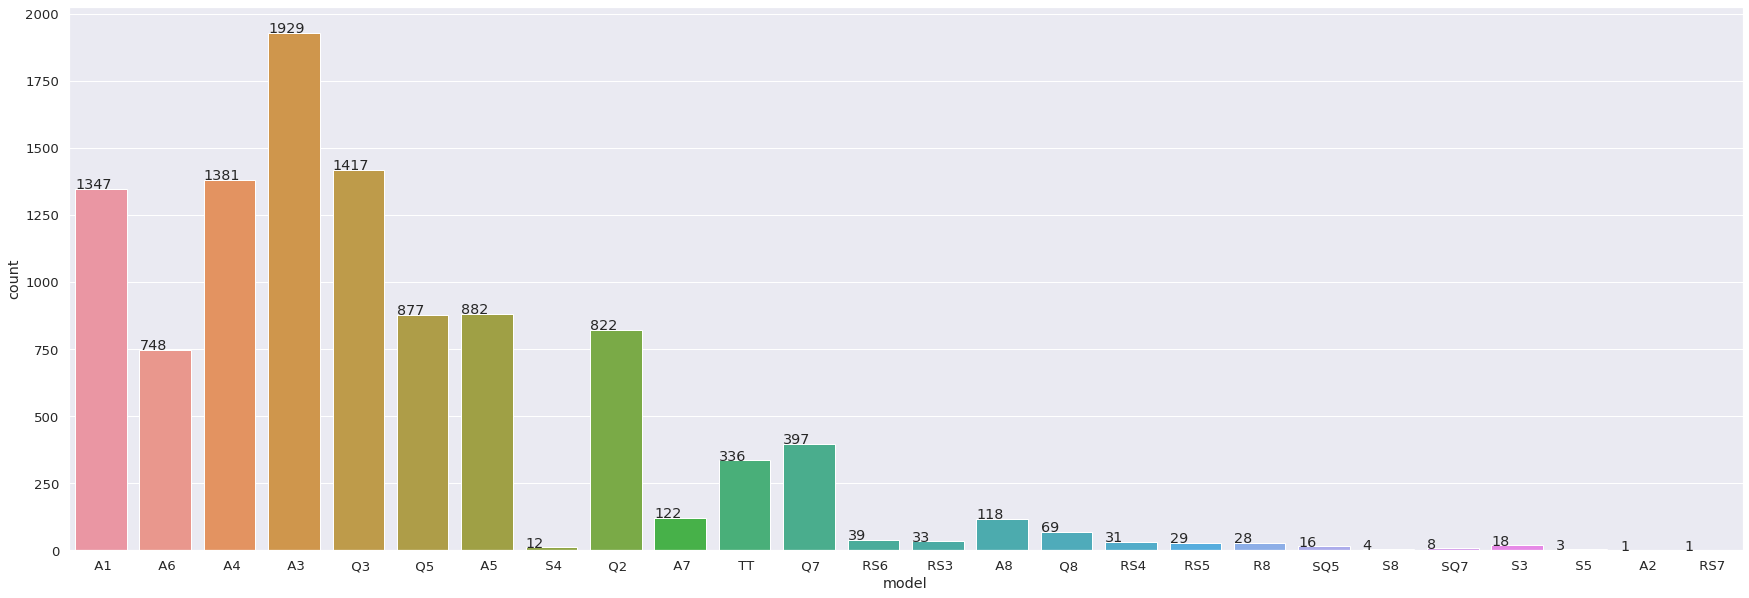

In [ ]:
sns.set(font_scale=1.2)
fig, ax = plt.subplots(figsize=(30, 10))

ax = sns.countplot(x='model', data=df)
for p in ax.patches:
   ax.annotate('{:}'.format(p.get_height()), (p.get_x(), p.get_height()+0.01))

plt.show()

Vypsali jsme si všechny modely a počet jejich zastoupení v datasetu.
Můžeme zde vidět, že počet vozidel některých modelů je vilce malý, a tak je moc nesmyslu plné s těmito modely dělat nějaké průměrné výpočty, jelikož jeden samotný vůz nemusí ukazovat reálné hodnoty tohoto modelu.

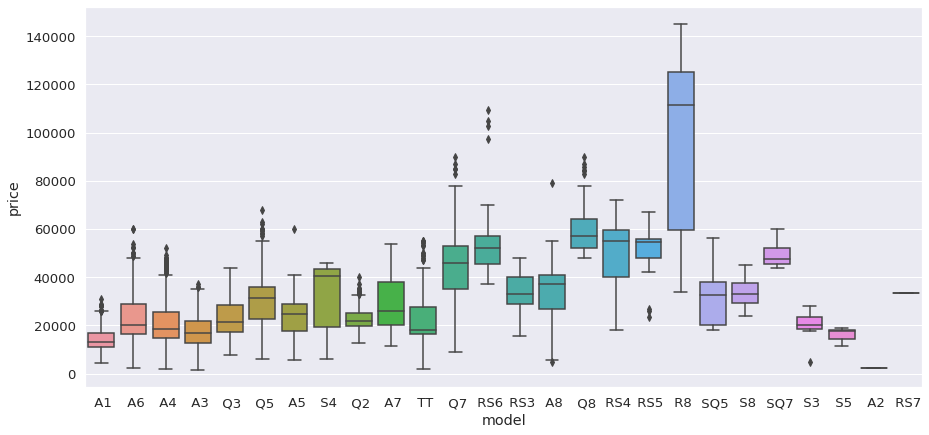

In [ ]:
sns.set(font_scale=1.2)
fig, ax = plt.subplots(figsize=(15, 7))
sns.boxplot(data=df, x='model', y="price")

Třeba zde můžeme vidět modely a jejich ceny, kde čára uprostřed boxu nám značí medián, že je zde několik outlierů, které nám neurčují reálnou hodnotu vozu, takže u modelu s jedním vozem je velká pravděpodobnost, že se tohle může stát.

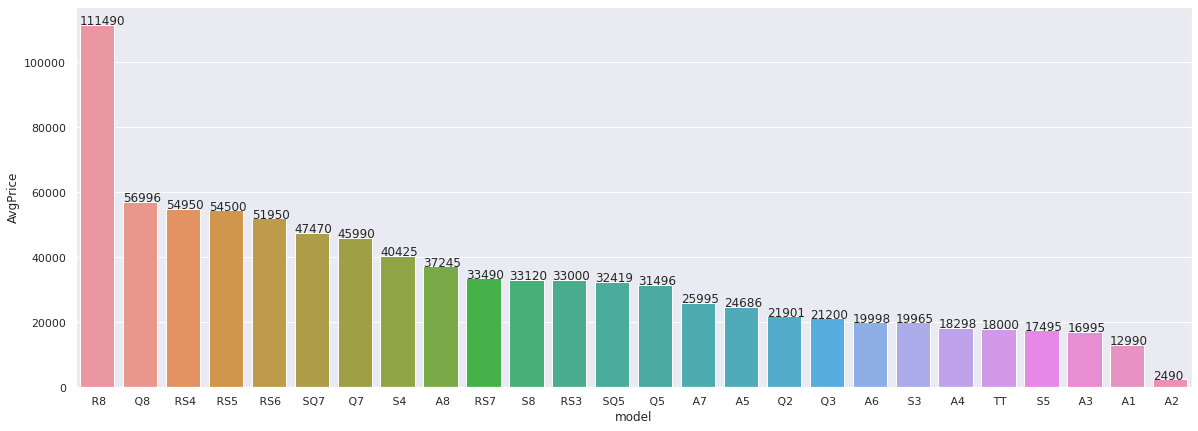

In [ ]:
sns.set(font_scale=1.0)
fig, ax = plt.subplots(figsize=(20, 7))
dataAvg = df.groupby("model").price.median().reset_index(name = "AvgPrice").sort_values(by="AvgPrice", ascending=False)

ax = sns.barplot(data = dataAvg, x = "model", y = "AvgPrice")
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x(), p.get_height()+0.01))
plt.show()

Zde můžeme vidět medián ceny všech modelů, kde můžeme vidět, že největší medián se nachází s velkým odstupem u modelu R8, další je pak model Q8, po něm již klesá cena mírněji. Poslední je model A2, který ale má jen jedno vozidlo. 

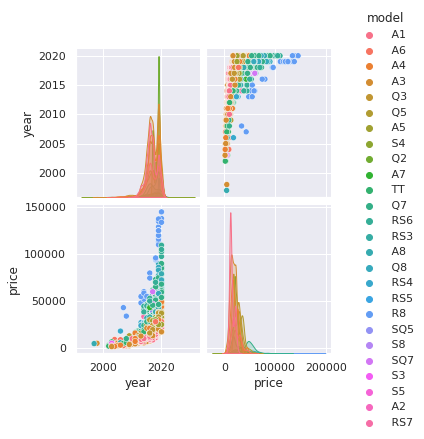

In [ ]:
sns.set(font_scale=1.0)
selected_columns = ['year',	'price']
sns.pairplot(df, vars = selected_columns, hue="model")

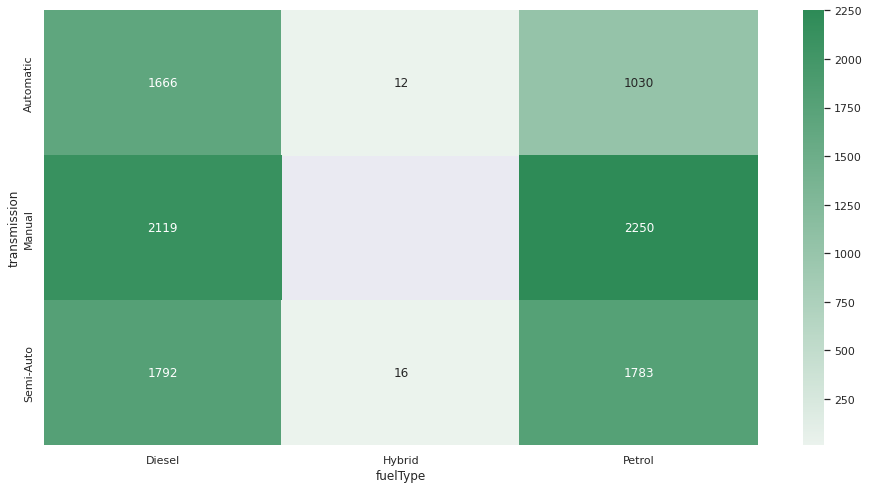

In [ ]:
tmp1 = df.groupby(["transmission", "fuelType"]).model.count().reset_index(name="Count")
tmp2 = tmp1.pivot(index = "transmission", columns="fuelType", values="Count")
plt.figure(figsize=(16, 8))
sns.heatmap(tmp2, cmap=sns.light_palette("seagreen", as_cmap=True), annot=True,fmt='g')

# 1) Vliv typu Paliva na spotřebu u daných modelů

Podíváme se modely, které mají minimálně dvě pohonné hmoty, abychom mohli porovnat, které jsou šetrnější, tedy spotřebují méně paliva. 
Dle mě by měl nejvíce brát paliva Benzín, protože dle všech článků vidíme, že je jejich spotřeba vyšší než Nafty. Také je možné, že Hybridní by mohl brát nejméně, protože si vezme palivo dle dané cesty, takže využívá to výhodnější palivo pro daný úsek. Otázka je, zda je to tak vážně u každého modelu stejně.

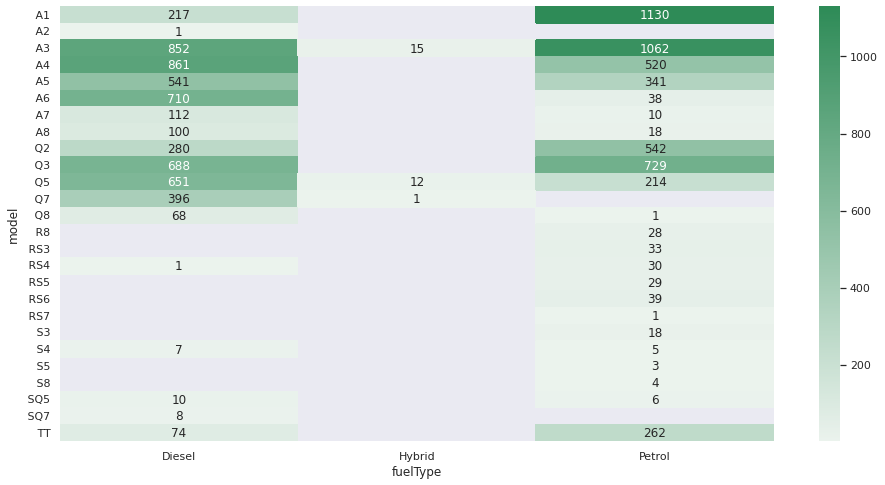

In [ ]:
sns.set(font_scale=1.0)
tmp1 = df.groupby(["model", "fuelType"]).model.count().reset_index(name="Count")
tmp2 = tmp1.pivot(index = "model", columns="fuelType", values="Count")
plt.figure(figsize=(16, 8))
sns.heatmap(tmp2, cmap=sns.light_palette("seagreen", as_cmap=True), annot=True,fmt='g')

Zde si spočítame kolik modelů má více než jednu pohonnou hmotu

In [ ]:
j = 0
for i in range(len(df.model.unique())):
  df_help = df.loc[df['model'] == df.model.unique()[i]]
  if len(df_help.fuelType.unique()) > 1:
    j = j+1

Zde máme vykreslení každého modelu a porovnání pohonných hmot a počet zastoupení v každém z nich.

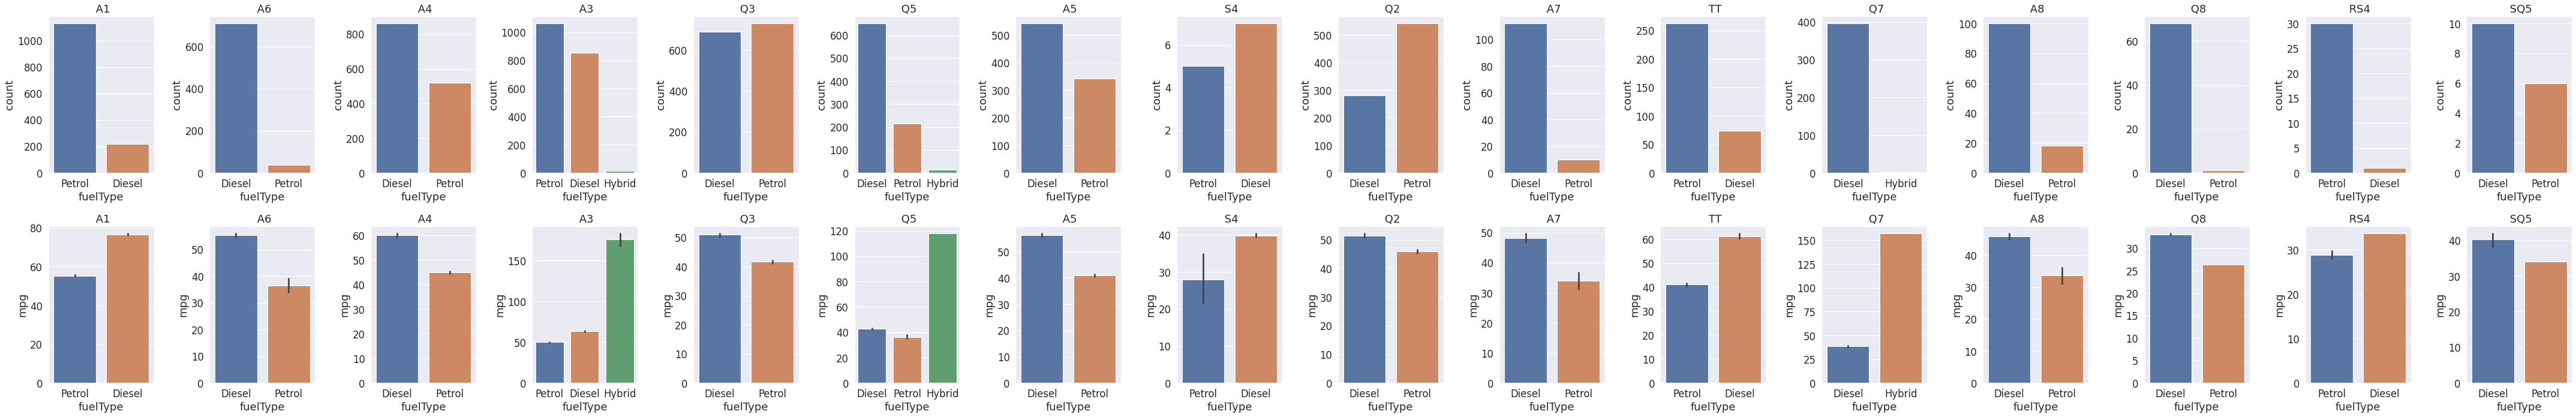

In [ ]:
x = 0
sns.set(font_scale=1.5)
fig, axes = plt.subplots(2, j, figsize=(60, 10))

for i in range(len(df.model.unique())):
  df_help = df.loc[df['model'] == df.model.unique()[i]]
  if len(df_help.fuelType.unique()) > 1:
    ax_one = fig.axes[x]
    ax_two = fig.axes[j+x]
    sns.countplot(data=df_help, x='fuelType',ax=ax_one).set(title=df.model.unique()[i])
    sns.barplot(data=df_help, x='fuelType', y="mpg",ax=ax_two).set(title=df.model.unique()[i])
    x = x + 1
    

fig.tight_layout()


Odstranil jsem modely, které mají pouze jeden typ pohonné hmoty, jelikož by porovnání pro jeden prvek nedávalo význam.

Z grafů můžeme vidět, že ať už je model jakýkoliv, tak Hybridní palivo dokáže na jeden galon ujet o hodně větší množství mil, než ostatní pohonné hmoty.
Také můžeme vidět, že druhá pohonná hmota, ketrá ujede více mil na jeden galon, je Diesel, který i ve skutečnosti ujede více km na jeden litr paliva. 

Takže se potvrdila má teorie, kde jsem tato tvrzení říkal.

# 2) Změna pohonných hmot věkem vozidel

Dle mě by se měla u vozů s věkem měnit pohonná hmota, jelikož lidé nyní začínají používat vozidla, která jsou, nebo minimálně vypadají, že jsou ekologicky šetrnější, než starší pohonné hmoty, které se vyrábí z ropy.

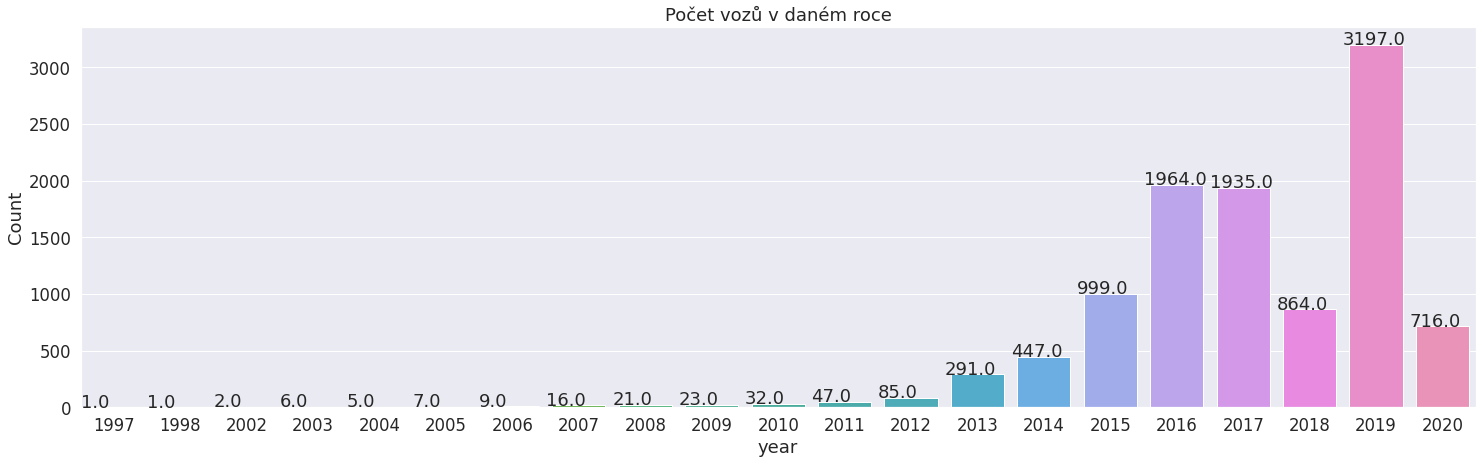

In [ ]:
df2 = df.groupby(["year"]).year.count().reset_index(name="Count")
df2

fig, ax = plt.subplots(figsize=(25, 7))
sns.set(font_scale=1.5)
ax = sns.barplot(data = df2, x = "year", y = "Count")
for p in ax.patches:
   ax.annotate((p.get_height()), (p.get_x()-0.1, p.get_height()+0.01))
plt.title("Počet vozů v daném roce")
plt.show()

Můžeme vidět, že počet největší počet vozidel je aktuálně z roku 2019. Dle všeho jde vidět, že to je spíše modernější Autobazar, s použitýmy vozy, jelikož mají především novější auta.

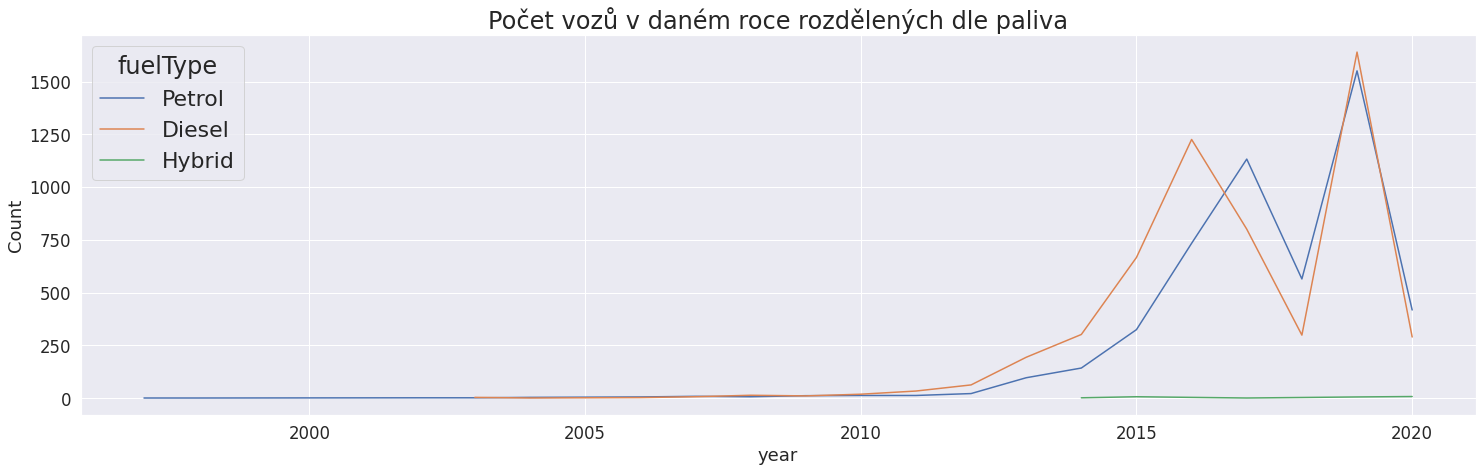

In [ ]:
df2 = df.groupby(["year","fuelType"]).agg({ 'fuelType':'count'}).rename(columns={'fuelType':'Count'})
df2

fig, ax = plt.subplots(figsize=(25, 7))
sns.set(font_scale=2)
ax = sns.lineplot(data = df2, x = "year", y = "Count", hue="fuelType")
for p in ax.patches:
   ax.annotate('{:}'.format(p.get_height()), (p.get_x()-0.1, p.get_height()+0.01))
plt.title("Počet vozů v daném roce rozdělených dle paliva")
plt.show()

Z grafu můžeme vidět, že převládaly dříve spíše vozy, jezdící na Benzín, ale po roce  2010, se začaly ale používaly spíše auta s Dieslem. Od roku 2014, se ale začaly používat také Hybridní vozidla. Také můžeme vidět, že celkově není již moc aut, které by byly vytvořeny před rokem 2000. Lze vidět také, že aktuálně mají použité vozy především z let 2015 až 2020.

# 3) Vliv věku a ujetý počet mil na cenu

Každé auto má cenu, v tomhle případě budeme řešit, zda je hlavním důvodem proč se mění cena auta věk, počet ujetých mílí, nebo obojí.

Dle mě bude mít obojí stejný vliv na cenu, protože při větším počtu ujetých mil je větší šance, že auto bude mít závadu a při stáří může vadit koroze a jiné neduhy starších aut. U věku ale může také hrát roli i to, zda není auto veterán, kdy by jeho cena vzrostla.

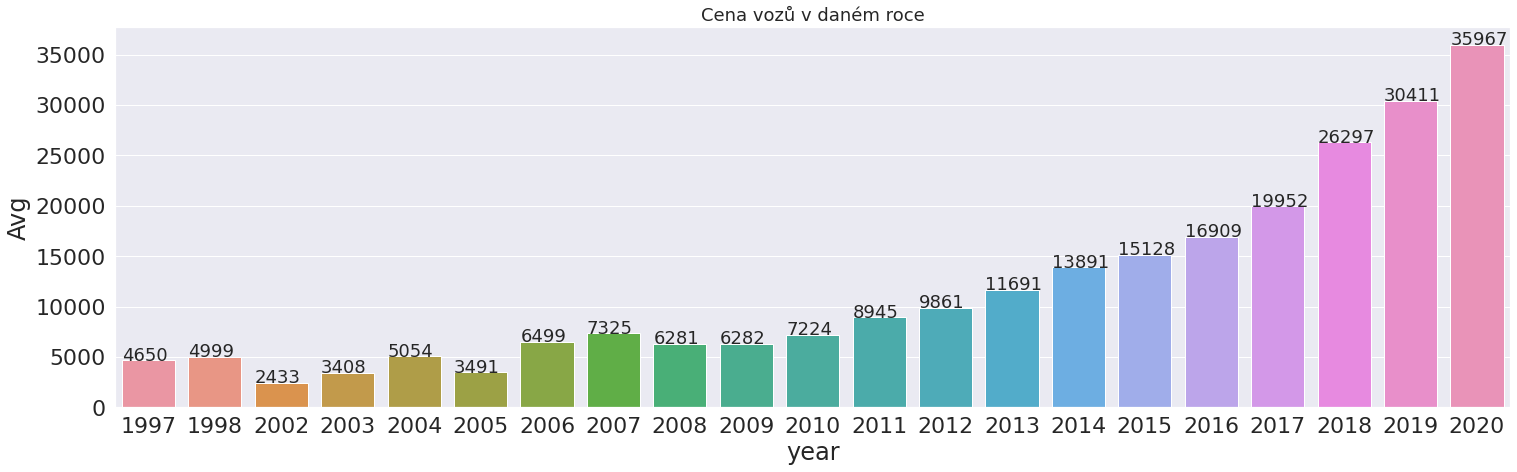

In [ ]:
df2 = df.groupby(["year"]).price.mean().reset_index(name="Avg")
df2

fig, ax = plt.subplots(figsize=(25, 7))
sns.set(font_scale=1.5)
ax = sns.barplot(data = df2, x = "year", y = "Avg")
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x(), p.get_height()+0.01))
plt.title("Cena vozů v daném roce")
plt.show()

Zde můžeme vidět, že se každým rokem cena vozidel většinou zvětšuje 

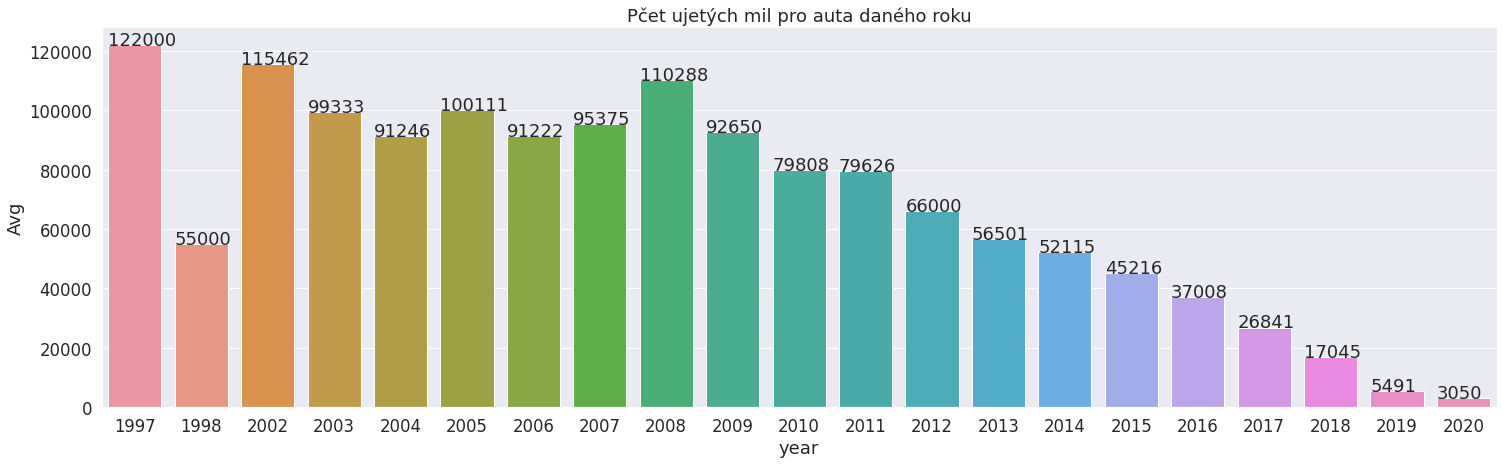

In [ ]:
df2 = df.groupby(["year"]).mileage.mean().reset_index(name="Avg")
df2

fig, ax = plt.subplots(figsize=(25, 7))
sns.set(font_scale=1.5)
ax = sns.barplot(data = df2, x = "year", y = "Avg")
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x(), p.get_height()+0.01))
plt.title("Pčet ujetých mil pro auta daného roku")
plt.show()

U počtu ujetých mil to není až tak jasné, ale stále lze vidět, že každým rokem spíše počet najetých mil klesá.

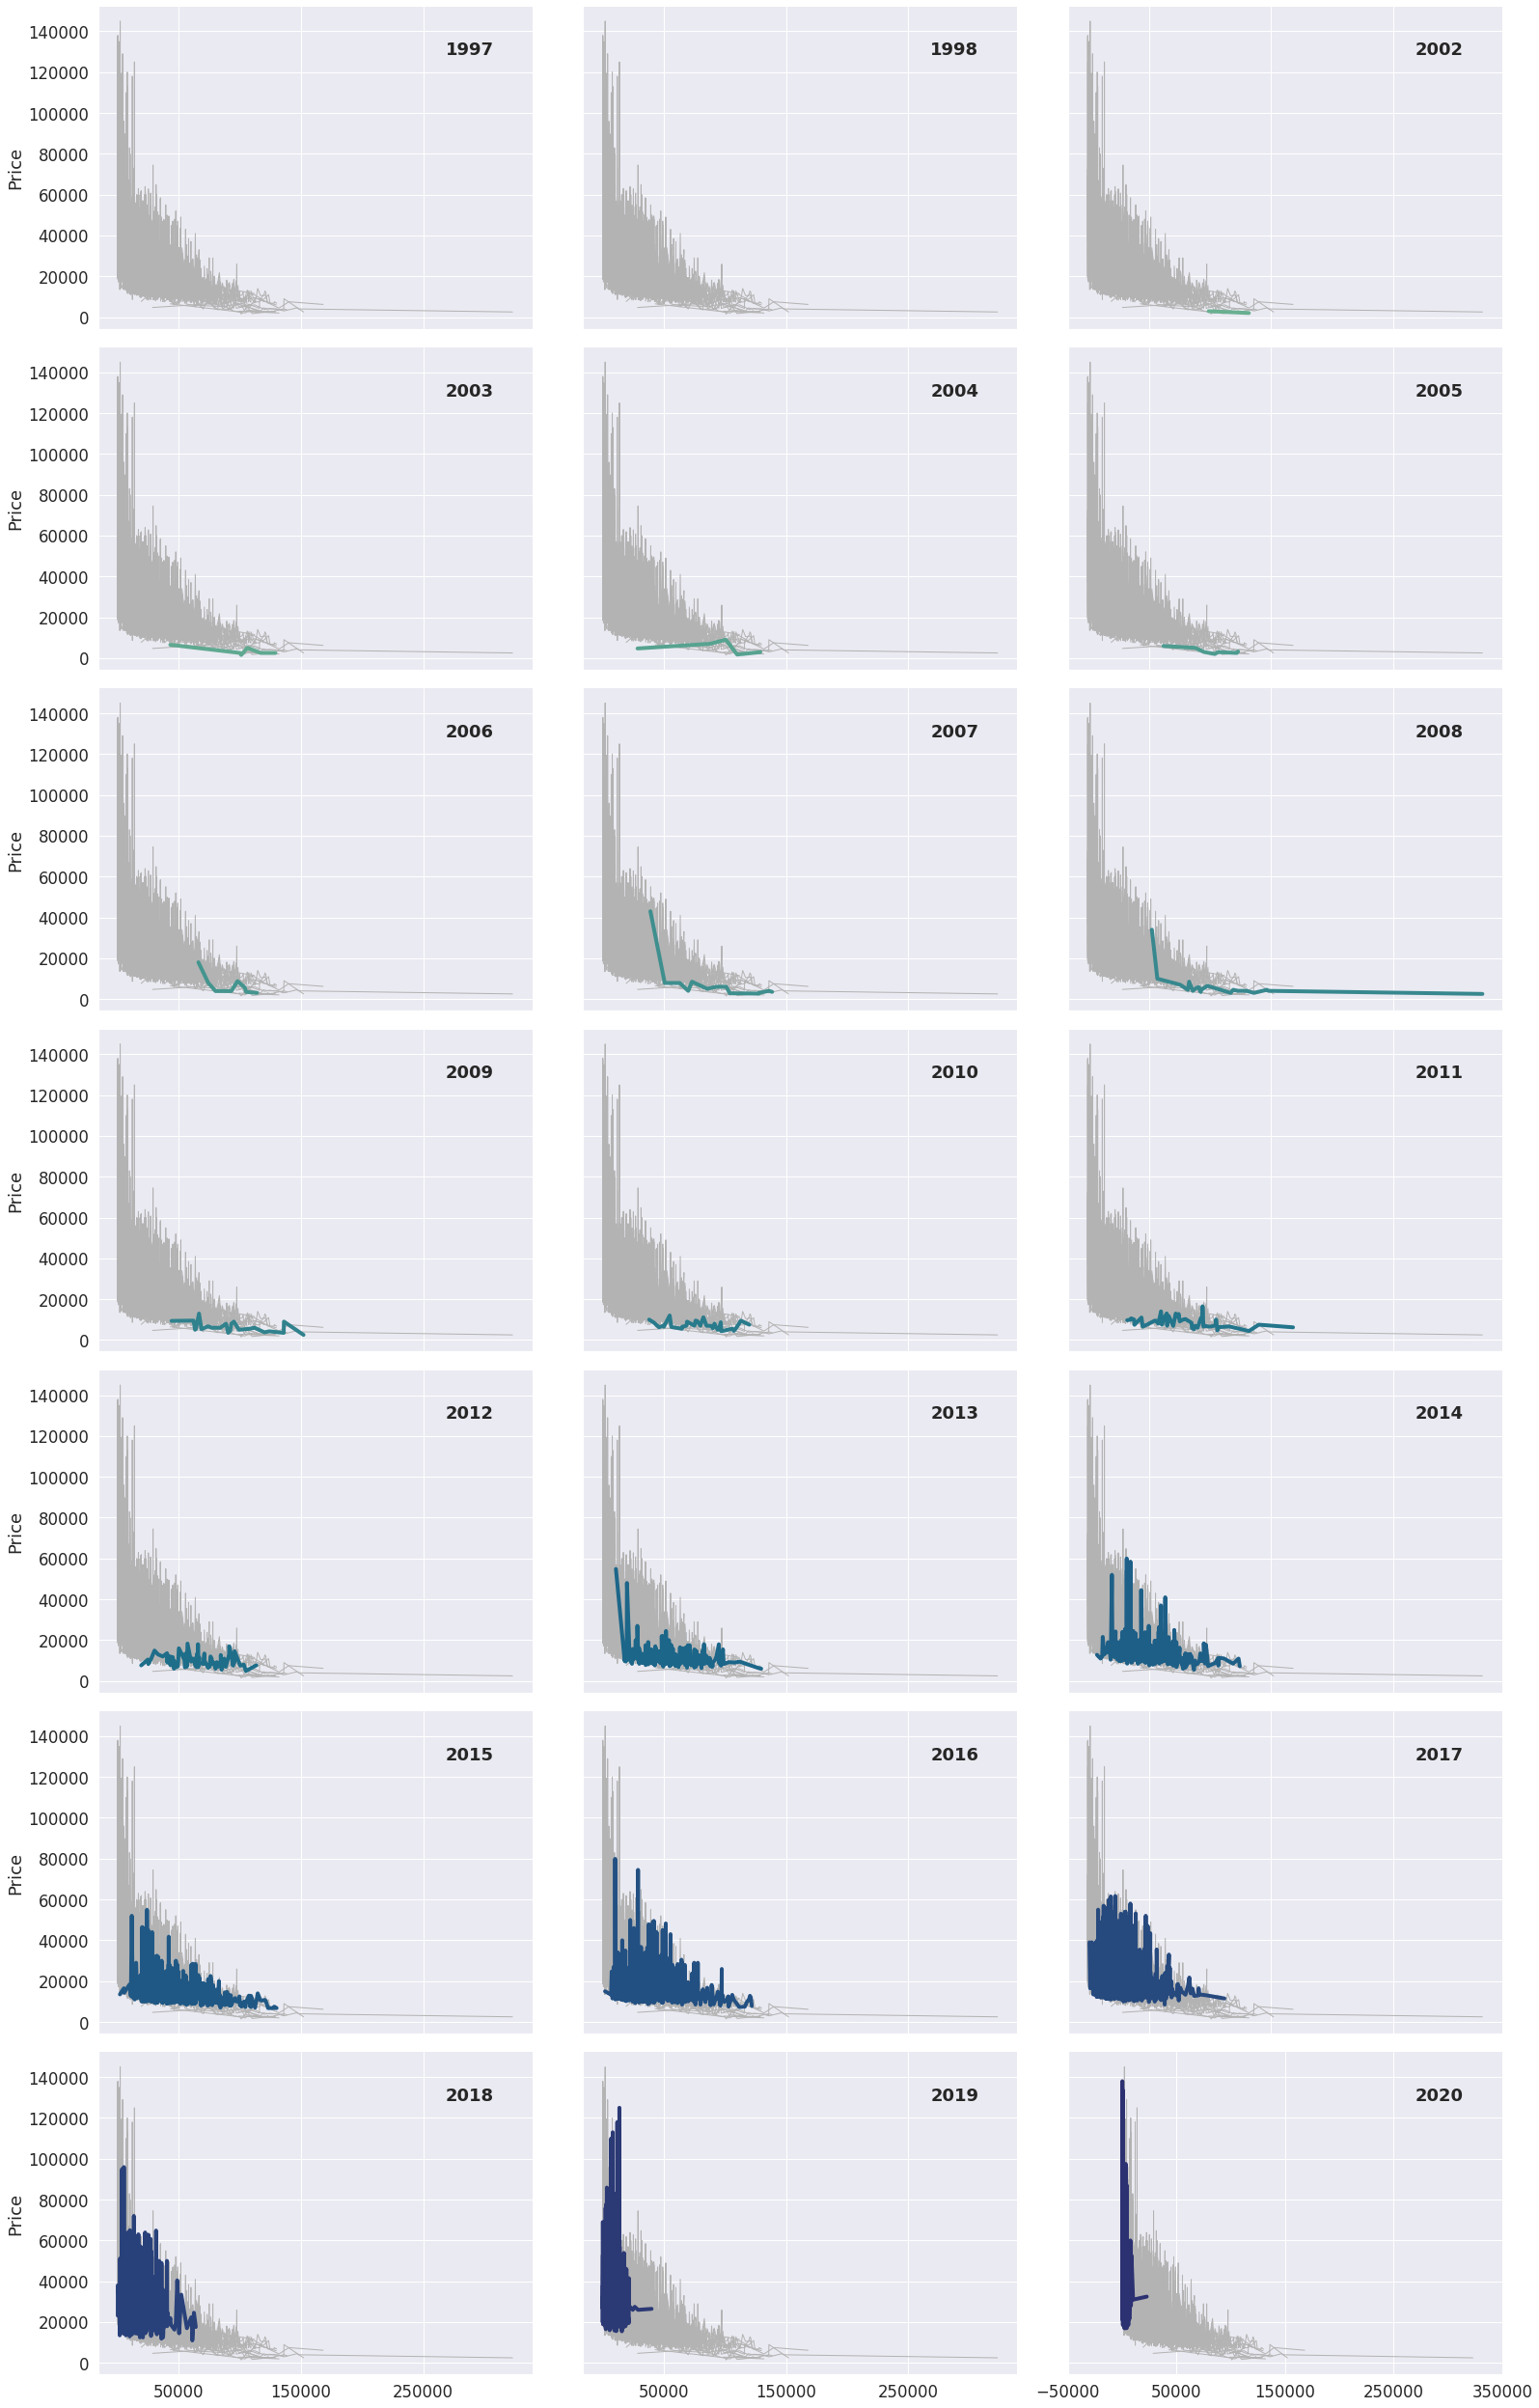

In [ ]:
sns.set(font_scale=1.5)
g = sns.relplot(
    data=df,
    x="mileage", y="price", col="year", hue="year",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, height=5, aspect=1.5, legend=False,
)

for year, ax in g.axes_dict.items():

    ax.text(.8, .85, year, transform=ax.transAxes, fontweight="bold")

    sns.lineplot(
        data=df, x="mileage", y="price", units="year",
        estimator=None, color=".7", linewidth=1, ax=ax,
    )

ax.set_xticks(ax.get_xticks()[::2])

g.set_titles("")
g.set_axis_labels("", "Price")
g.tight_layout()

Zde můžete vidět, že cena vozů starších je nízká při jakémkoliv počtu odjetých kilometrů. Novější vozy ale očekávaně mají méně ujetých kilometrů, ale jejich ceny jsou každým rokem dosti odlišné.

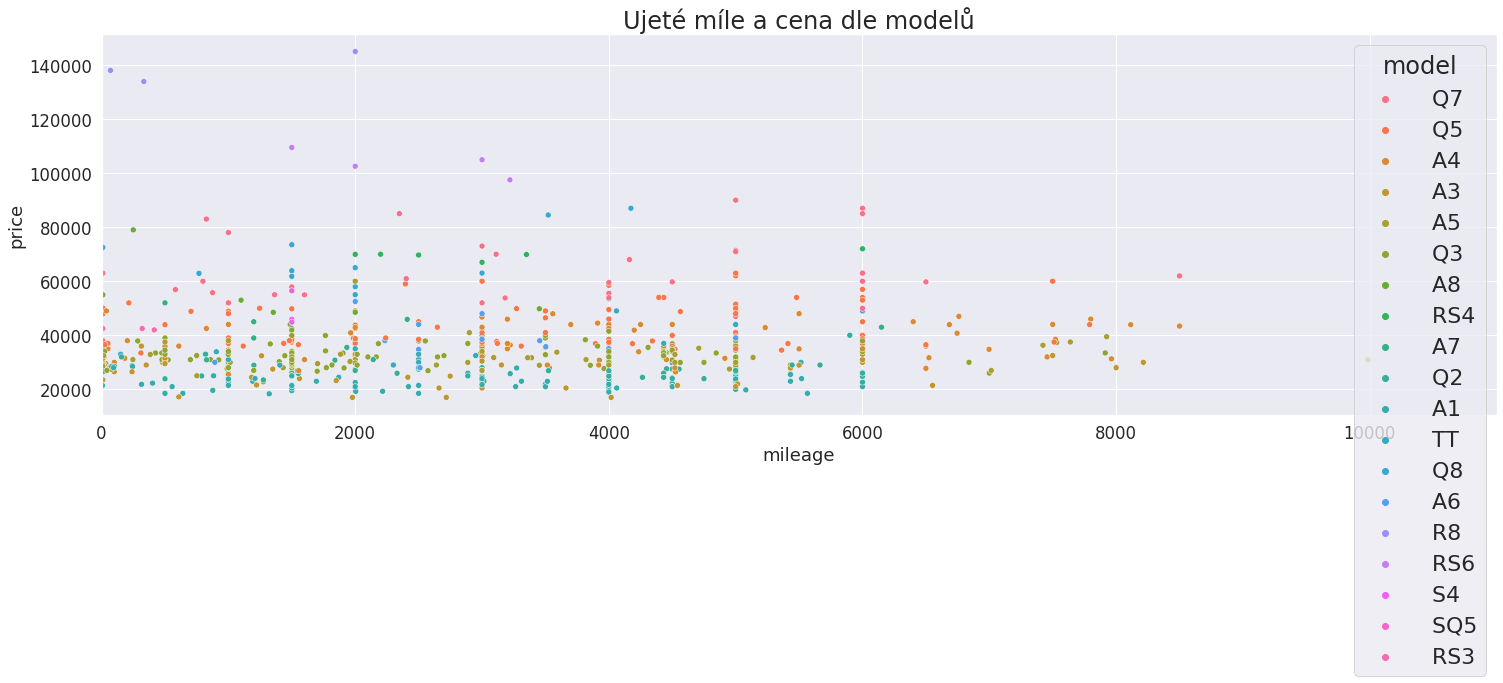

In [ ]:
df2 = df.loc[df['year'] == 2020]
df2

fig, ax = plt.subplots(figsize=(25, 7))
sns.set(font_scale=2)
ax = sns.scatterplot(data = df2, x = "mileage", y = "price",hue="model")
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x(), p.get_height()+0.01))
plt.title("Ujeté míle a cena dle modelů")
plt.xlim(0, 11000)
plt.show()

Zde můžeme vidět, že cena je ovlivněna i díky tomu, o jaký model vozidla se jedná. Například RS6 je oproti ostatním dosti drahá a to při jakékoliv počtu najetých kilometrů.

Takže teorie, že cena je především věkem a počtem najetých mil spíše vyvrácena, protože některé vozy si přes najetý počet mil drží i klidně vyšší cenu. Takže je důležitá složka i model.

# 4) Závislot objemu motoru na typu paliva

Každý typ paliva je uzpůsoben pro jiny typ motoru, takže se může lišit spotřeba paliva u každého auta a tím pádem také i tím pádem je potřeba také přivěst více paliva do motoru. V 1. přípdau jsme zjistili, který typ paliva spotřebuje nejvíc paliva, tím byl Benzín, takže předpokládám, že největší objem motoru by mohl mít Benzín.

In [ ]:
df2 = df.groupby(["fuelType","engineSize"]).engineSize.count().reset_index(name="Count")
df2.head()

,fuelType,engineSize,Count
0,Diesel,0.0,16
1,Diesel,1.4,1
2,Diesel,1.5,1
3,Diesel,1.6,901
4,Diesel,1.9,4


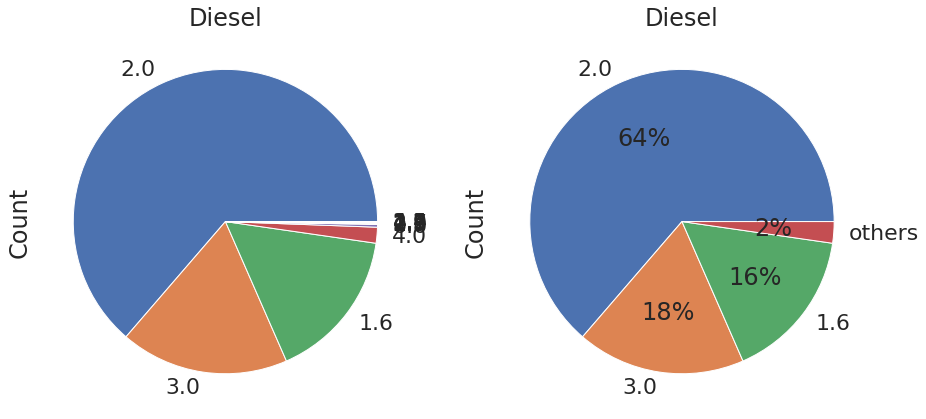

In [ ]:
df3 = df2.loc[df2['fuelType'] == "Diesel"]
df3 = df3.drop('fuelType', axis=1)
df3 = df3[df3.Count != 0]

df3 = df3.sort_values(by="Count",ascending=False)

df4 = df3.head(3)

#others
new_row = pd.DataFrame(data = {
    'engineSize' : ['others'],
    'Count' : [df3['Count'][3:].sum()]
})
#combining top 5 with others
df4 = pd.concat([df4, new_row])


fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15,15))
df3.plot(kind = 'pie', y = "Count", labels = df3['engineSize'], ax = axes[0])
df4.plot(kind = 'pie', y = "Count", labels = df4['engineSize'], ax = axes[1],autopct='%.0f%%')
axes[0].set_title('Diesel')
axes[1].set_title('Diesel')
axes[0].get_legend().remove()
axes[1].get_legend().remove()
plt.show()

U Dieslu můžeme vidět, že většinové zastoupení mají právě motory o objemu 2 litrů a z toho hodnoty 3.0, 2.0 a 1.6 čítají 98%

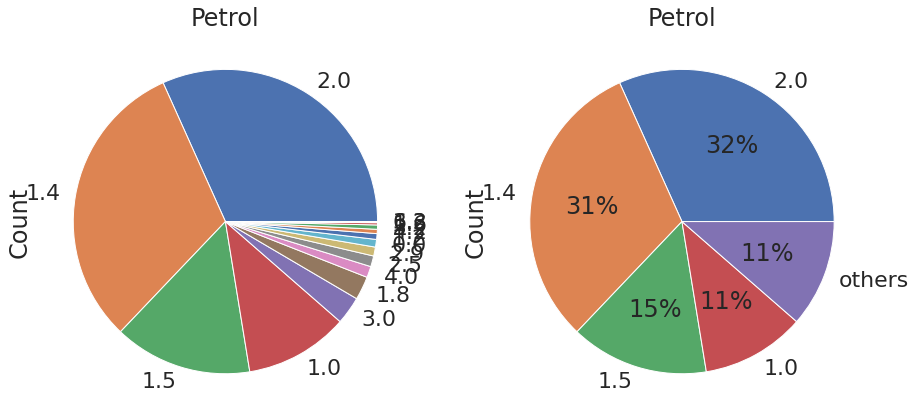

In [ ]:
df3 = df2.loc[df2['fuelType'] == "Petrol"]
df3 = df3.drop('fuelType', axis=1)
df3 = df3[df3.Count != 0]


df3 = df3.sort_values(by="Count",ascending=False)

df4 = df3.head(4)

#others
new_row = pd.DataFrame(data = {
    'engineSize' : ['others'],
    'Count' : [df3['Count'][4:].sum()]
})
#combining top 5 with others
df4 = pd.concat([df4, new_row])


fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15,15))
df3.plot(kind = 'pie', y = "Count", labels = df3['engineSize'], ax = axes[0])
df4.plot(kind = 'pie', y = "Count", labels = df4['engineSize'], ax = axes[1],autopct='%.0f%%')
axes[0].set_title('Petrol')
axes[1].set_title('Petrol')
axes[0].get_legend().remove()
axes[1].get_legend().remove()
plt.show()

U Nafty vidíme, že jsou zde 4 docela velké skupiny objemů motoru a to 1.4, 2.0, 1.5 a 1.0. Také zde můžeme vidět, že motory jezdící na Benzín mají většinou nižžsí objem motoru, než ostatní Nafta.

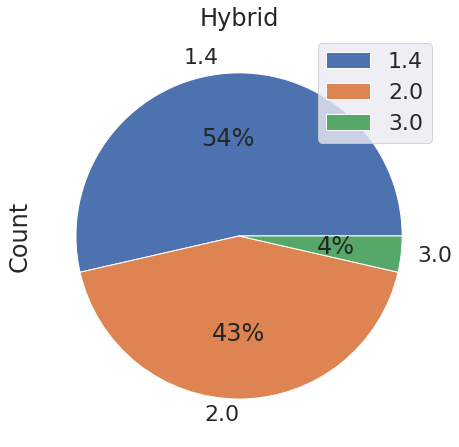

In [ ]:
df3 = df2.loc[df2['fuelType'] == "Hybrid"]
df3 = df3.drop('fuelType', axis=1)
df3 = df3[df3.Count != 0]


df3 = df3.sort_values(by="Count",ascending=False)

df4 = df3.head(4)

#others
new_row = pd.DataFrame(data = {
    'engineSize' : ['others'],
    'Count' : [df3['Count'][4:].sum()]
})
#combining top 5 with others
df4 = pd.concat([df4, new_row])


fig, ax = plt.subplots(figsize=(7.5, 7.5))
df3.plot(kind = 'pie', y = "Count", labels = df3['engineSize'],ax=ax,autopct='%.0f%%').set_title('Hybrid')
plt.show()

Hybridní palivo má zastoupení pouze 3 možností, kde jedna je malá oproti ostatním. Je to také díky tomu, že je zde malé zastoupení těchto vozů, jak jsme si již ukazovali výše. Můžeme také vidět, že tyto hodnoty jsou také největší zástupci Dieslů, nebo Benzínů, takže lze vidět, že je to takový kompromis mezi těmito palivy.

# 5) Daň dle modelu a roku výroby

Očekávám, že daň modelu bude s věkem větší díky různým ekologickým problémům, ale zároveň bych řekl, že nové vozy by také měly mít větší daň díky inflaci.

In [ ]:
df.tax.unique()

array([150,  20,  30, 145, 125, 200,   0, 205, 160, 235, 260, 325, 300,
       165, 240, 565, 265, 135, 570, 555, 140, 330, 305, 155, 580, 290,
       195, 115, 295, 220, 230, 280, 315, 535, 190, 540, 515])

Získáme si pro každý model a roky jeho průměrnou daň, abychom zjistili jejich průměrnou daň

In [ ]:
df2 = df.groupby(["model","year"]).tax.mean().reset_index(name="Avg")
df2.head()

,model,year,Avg
0,A1,2010,125.000000
1,A1,2011,79.000000
2,A1,2012,48.333333
3,A1,2013,74.137931
4,A1,2014,72.203390


Nyní si vypíšeme změny daně po letech u každého modelu

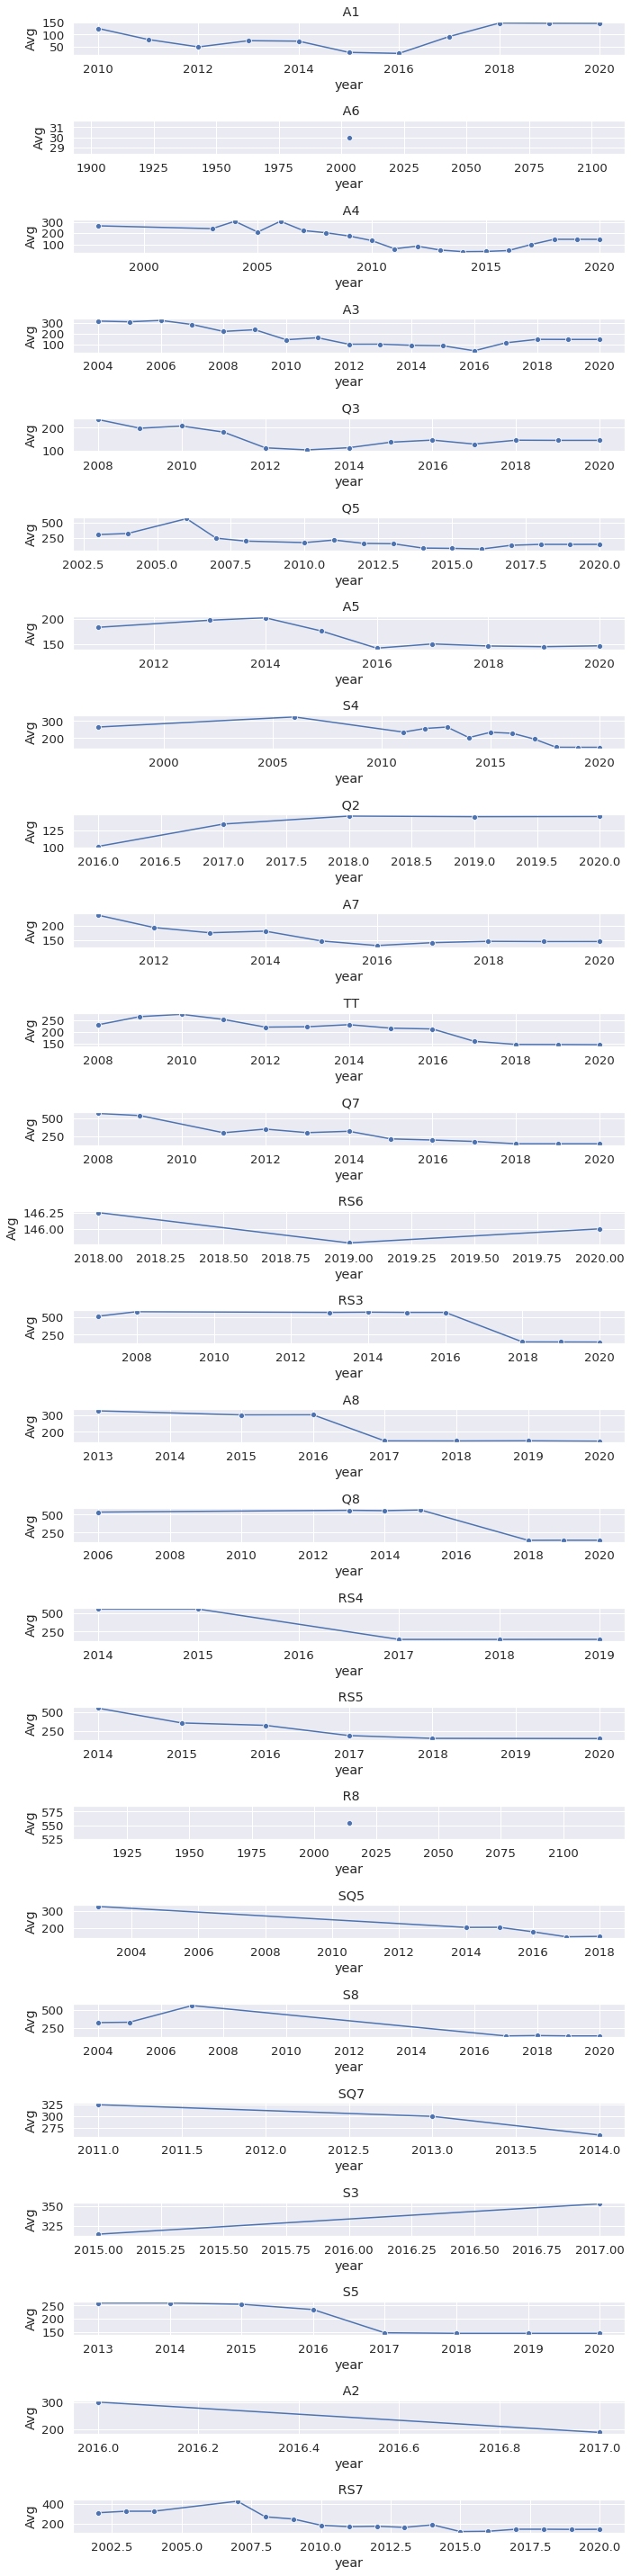

In [ ]:
sns.set(font_scale=1.2)
fig, axes = plt.subplots(len(df2.model.unique()),1 , figsize=(10, 40))

for i in range(len(df2.model.unique())):
  df_help = df2.loc[df2['model'] == df2.model.unique()[i]]
  ax_one = fig.axes[i]
  sns.lineplot(data = df_help, x = "year", y = "Avg",ax=ax_one,marker='o').set(title=df.model.unique()[i])
    
fig.tight_layout()

Z grafů můžeme vidět, že většinou, se daň je u mladšího auta menší, než u novějšího auta. Může to být tím, že auto starší vylučuje více škodlivin do ovzduší a tím pádem ničí životní prostředí, takže se platí daň za ekologii, která může cestovní daň zvětšit.

# 6) Spotřeba paliva dle Převodovky

Nyní zjistíme, jaký vliv má typ převodovky na spotřebu vozu.
 
Dle mě by tam rozdíl měl být, protože je rozdíl v rychlostech, kde bere vůz dle rychlosti jiné množství paliva.

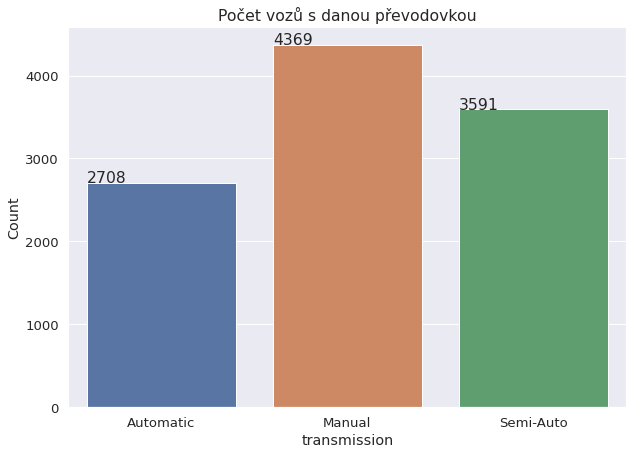

In [ ]:
df2 = df.groupby(["transmission"]).transmission.count().reset_index(name="Count")
df2

fig, ax = plt.subplots(figsize=(10, 7))
sns.set(font_scale=1.3)
ax = sns.barplot(data = df2, x = "transmission", y = "Count")
for p in ax.patches:
   ax.annotate('{:.0f}'.format((p.get_height())), (p.get_x(), p.get_height()+0.01))
plt.title("Počet vozů s danou převodovkou")
plt.show()

Můžeme vidět, že nejvíc je aut jezdících na manuál

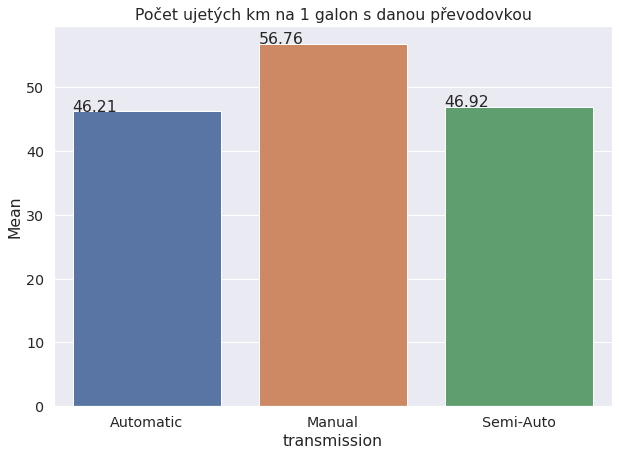

In [ ]:
df2 = df.groupby(["transmission"]).mpg.mean().reset_index(name="Mean")
df2

fig, ax = plt.subplots(figsize=(10, 7))
sns.set(font_scale=1.3)
ax = sns.barplot(data = df2, x = "transmission", y = "Mean")
for p in ax.patches:
   ax.annotate('{:.2f}'.format((p.get_height())), (p.get_x(), p.get_height()+0.01))
plt.title("Počet ujetých km na 1 galon s danou převodovkou")
plt.show()

Zde vidíme, že nejmenší spotřebu má manuální převodovka, o +/- 10 mil oproti ostatním vozům, což je docela dost ušetřeného množství.
Nicméně se podíváme ješte u každého modelu zvlášť.

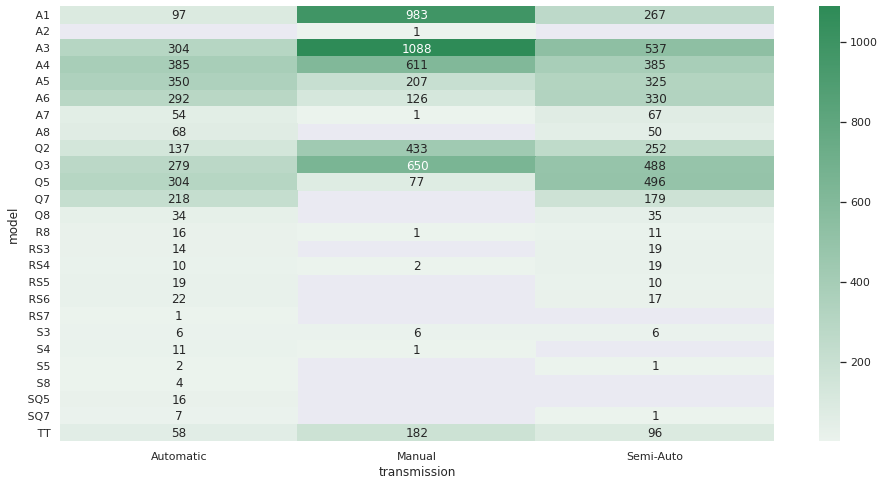

In [ ]:
tmp1 = df.groupby(["model", "transmission"]).model.count().reset_index(name="Count")
tmp2 = tmp1.pivot(index = "model", columns="transmission", values="Count")
sns.set(font_scale=1.0)
plt.figure(figsize=(16, 8))
sns.heatmap(tmp2, cmap=sns.light_palette("seagreen", as_cmap=True), annot=True,fmt='g')

Ještě se podíváme na modely, kde dává smysl je porovnávat, protože mají jen jeden typ převodovky.

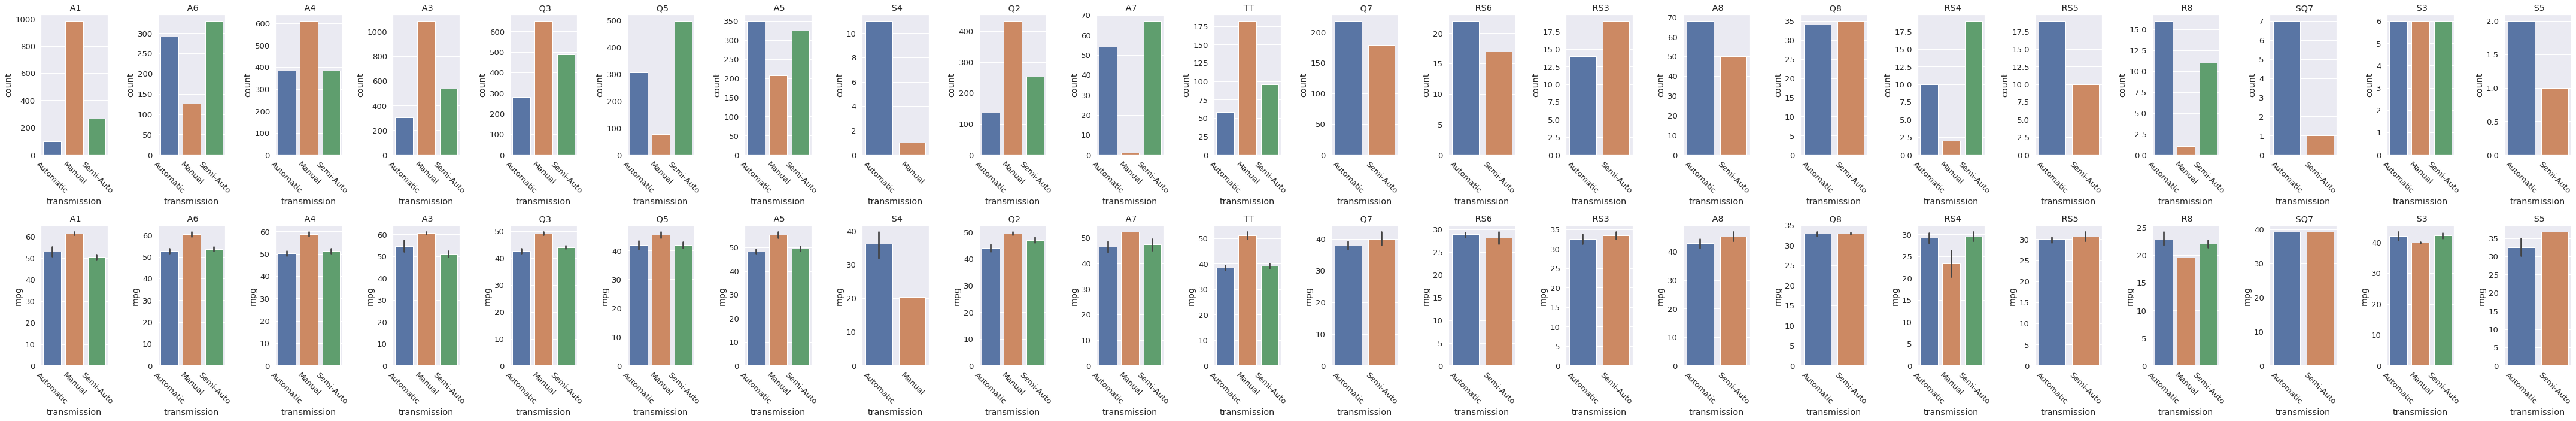

In [ ]:
j = 0
for i in range(len(df.model.unique())):
  df_help = df.loc[df['model'] == df.model.unique()[i]]
  if len(df_help.transmission.unique()) > 1:
    j = j+1
    
x = 0
sns.set(font_scale=1.2)
fig, axes = plt.subplots(2, j, figsize=(60, 10))

for i in range(len(df.model.unique())):
  df_help = df.loc[df['model'] == df.model.unique()[i]]
  if len(df_help.transmission.unique()) > 1:
    ax_one = fig.axes[x]
    ax_two = fig.axes[j+x]
    ax_one.tick_params(axis='x', rotation=-45)
    ax_two.tick_params(axis='x', rotation=-45)
    sns.countplot(data=df_help.sort_values(by="transmission"), x='transmission',ax=ax_one).set(title=df.model.unique()[i])
    sns.barplot(data=df_help.sort_values(by="transmission"), x='transmission', y="mpg",ax=ax_two).set(title=df.model.unique()[i])
    x = x + 1
    

fig.tight_layout()


Zde můžeme vidět, že většina vozů ujede na jeden galon nejvíce mil s Manuální převodovkou, ale není to tak vždy, protože u některých modelů jsou výhodnější motory s jinou převodovkou. Nicméně trend toho, že Poloautomat a automat mají podobnou spotřebu, takže předchozí graf pro všechny modely dohromady nebyl úplně mimo. 

Nicméně se potvrdilo mé tvrzení, že rozdíly mezi převodovkami jsou 

# 7) Vliv velikosti motoru na spotřebě paliva u dané převodovky


Zjístíme, zda má objem motoru vliv na spotřebu paliva.
Myslím si, že určitě bude mít vliv velikosti motoru na spotřebu, jelikož motor si vezme větší množství paliva 

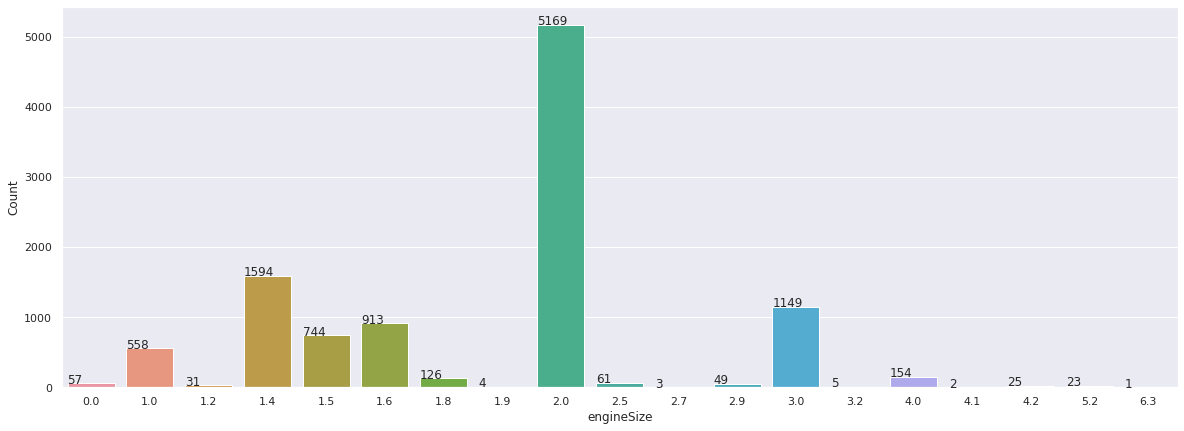

In [ ]:
sns.set(font_scale=1.0)
fig, ax = plt.subplots(figsize=(20, 7))
dataAvg = df.groupby("engineSize").engineSize.count().reset_index(name = "Count")

ax = sns.barplot(data = dataAvg, x = "engineSize", y = "Count")
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x(), p.get_height()+0.01))
plt.show()

Vidíme, že je zde plno malých hodnot, kde budou tyto hodnoty zkreslené. Pojdmě se ale stejně podívat kolik každý průměrně bere paliva.

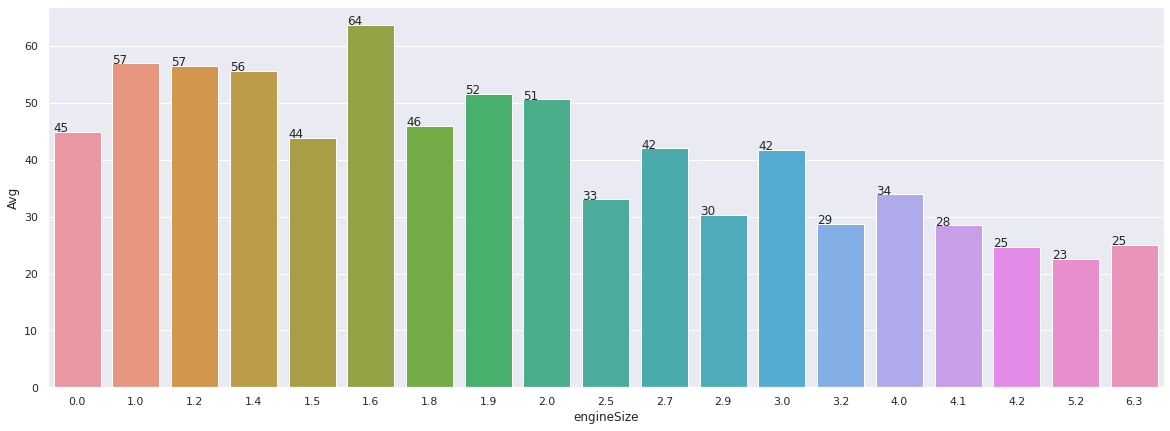

In [ ]:
sns.set(font_scale=1.0)
fig, ax = plt.subplots(figsize=(20, 7))
dataAvg = df.groupby("engineSize").mpg.mean().reset_index(name = "Avg")

ax = sns.barplot(data = dataAvg, x = "engineSize", y = "Avg")
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x(), p.get_height()+0.01))
plt.show()

In [ ]:
df2 = df.groupby(["transmission"]).mpg.mean().reset_index(name="Avg")
df2.head()

,transmission,Avg
0,Automatic,46.214660
1,Manual,56.758801
2,Semi-Auto,46.918992


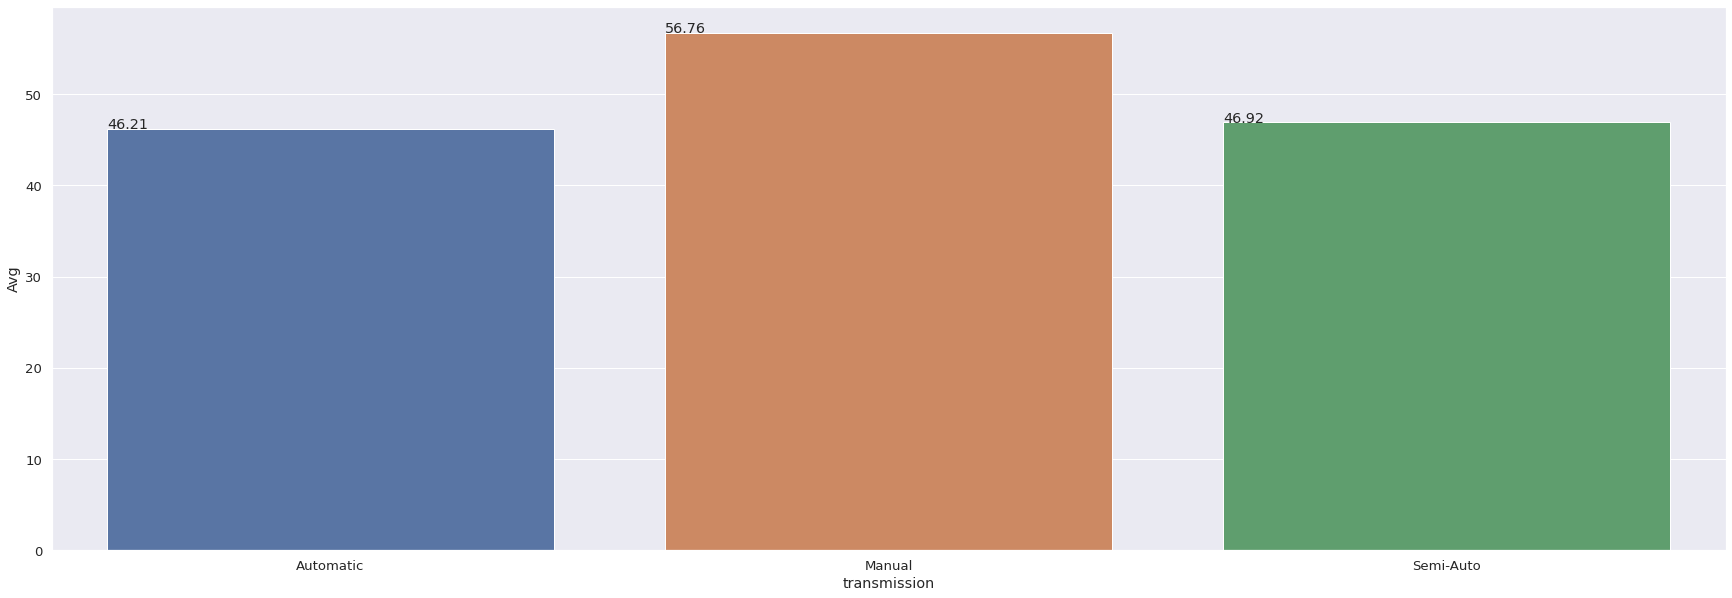

In [ ]:
sns.set(font_scale=1.2)
fig, ax = plt.subplots(figsize=(30, 10))

ax = sns.barplot(data=df2, x='transmission', y='Avg')
for p in ax.patches:
   ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x(), p.get_height()+0.01))

plt.show()

Tohle je průměrná spotřeba u každé převodovky, což jsme si dělali již předtím.

Můžeme vidět, že nejvíce se ujede na manuální převodovku, a automaticka a poloautomatická jsou na tom stejně.

In [ ]:
df2 = df.groupby(["engineSize"]).mpg.mean().reset_index(name="Avg")
df2.head()

,engineSize,Avg
0,0.0,44.907018
1,1.0,56.975269
2,1.2,56.577419
3,1.4,55.629674
4,1.5,43.852957


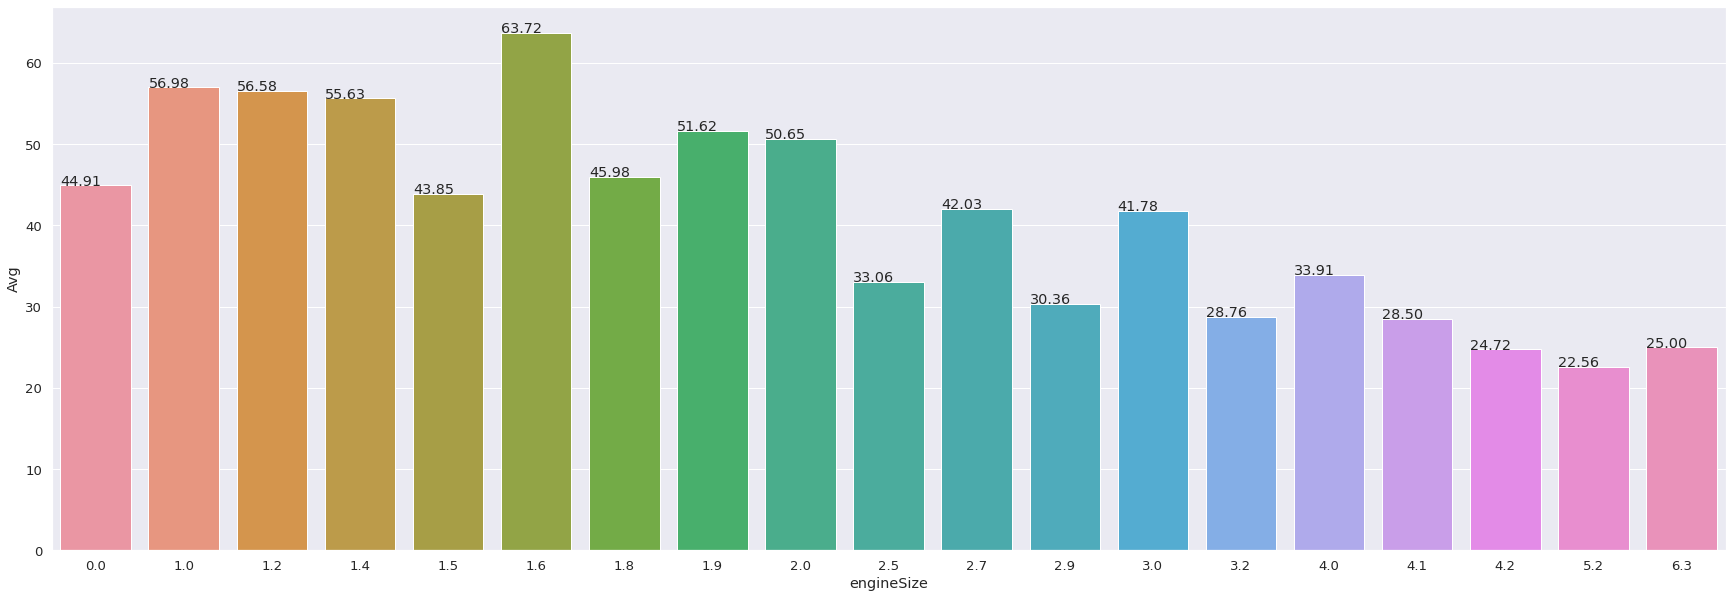

In [ ]:
sns.set(font_scale=1.2)
fig, ax = plt.subplots(figsize=(30, 10))

ax = sns.barplot(data=df2, x='engineSize', y='Avg')
for p in ax.patches:
   ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x(), p.get_height()+0.01))

plt.show()

Zde zase vidíme, že +/- se počet ujetých mil čím dál víc zmenšuje. Takže si myslím, že převodovka a velikost motoru na sobě závisí.

In [ ]:
df2 = df.groupby(["transmission","engineSize"]).mpg.mean().reset_index(name="Avg")
df2.head()

,transmission,engineSize,Avg
0,Automatic,0.0,44.292308
1,Automatic,1.0,50.359375
2,Automatic,1.2,57.700000
3,Automatic,1.4,61.556522
4,Automatic,1.5,43.263889


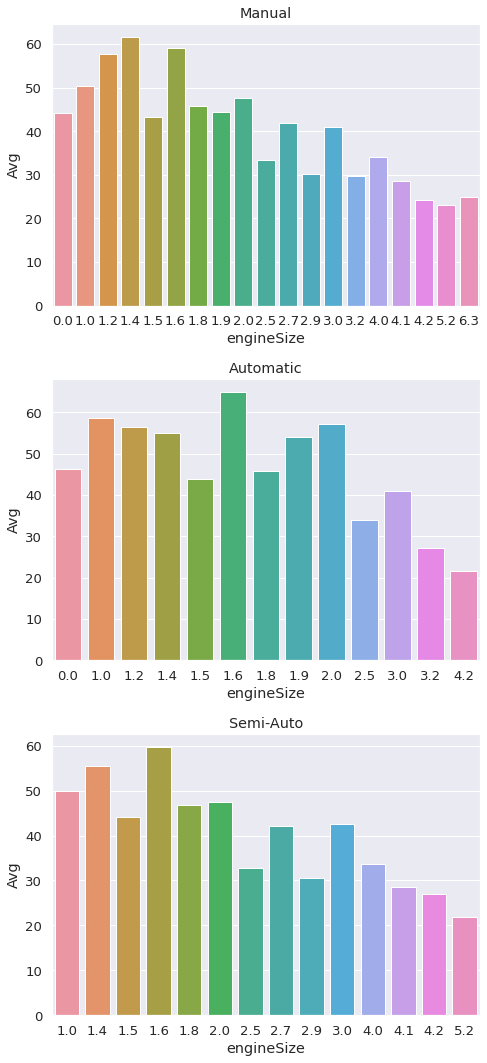

In [ ]:
sns.set(font_scale=1.2)
fig, axes = plt.subplots(len(df2.transmission.unique()),1 , figsize=(7, 15))

for i in range(len(df2.transmission.unique())):
  df_help = df2.loc[df2['transmission'] == df2.transmission.unique()[i]]
  ax_one = fig.axes[i]
  sns.barplot(data = df_help, x = "engineSize", y = "Avg",ax=ax_one).set(title=df.transmission.unique()[i])
    
fig.tight_layout()

Zjistili jsme, že u manuálu a poloautomatické převodovky se možná ujetá vzdálenost zmenšuje. Naopak u automatické převodovky se nejsou úplně jednoznačné, ale 2 největší objemy stále ujedou hodně málo.

Zjistili jsme tedy, že závisí především na objemu motoru, než na převodovce.

# 8) Daň dle paliva

Nyní se podíváme, jestli má vliv typ paliva na daň, ketrou musí řidič zaplatit.
Dle mě bude mít palivo vozidla vliv na to, kolik bude muset člověk zaplatit za vozidlo, protože každé palivo může být jinak škodilvé na ovzduší, takže čekám daň dle paliva.

In [ ]:
df2 = df.groupby(["fuelType"]).tax.mean().reset_index(name="Avg")
df2.head()

,fuelType,Avg
0,Diesel,119.656625
1,Hybrid,72.678571
2,Petrol,133.306340


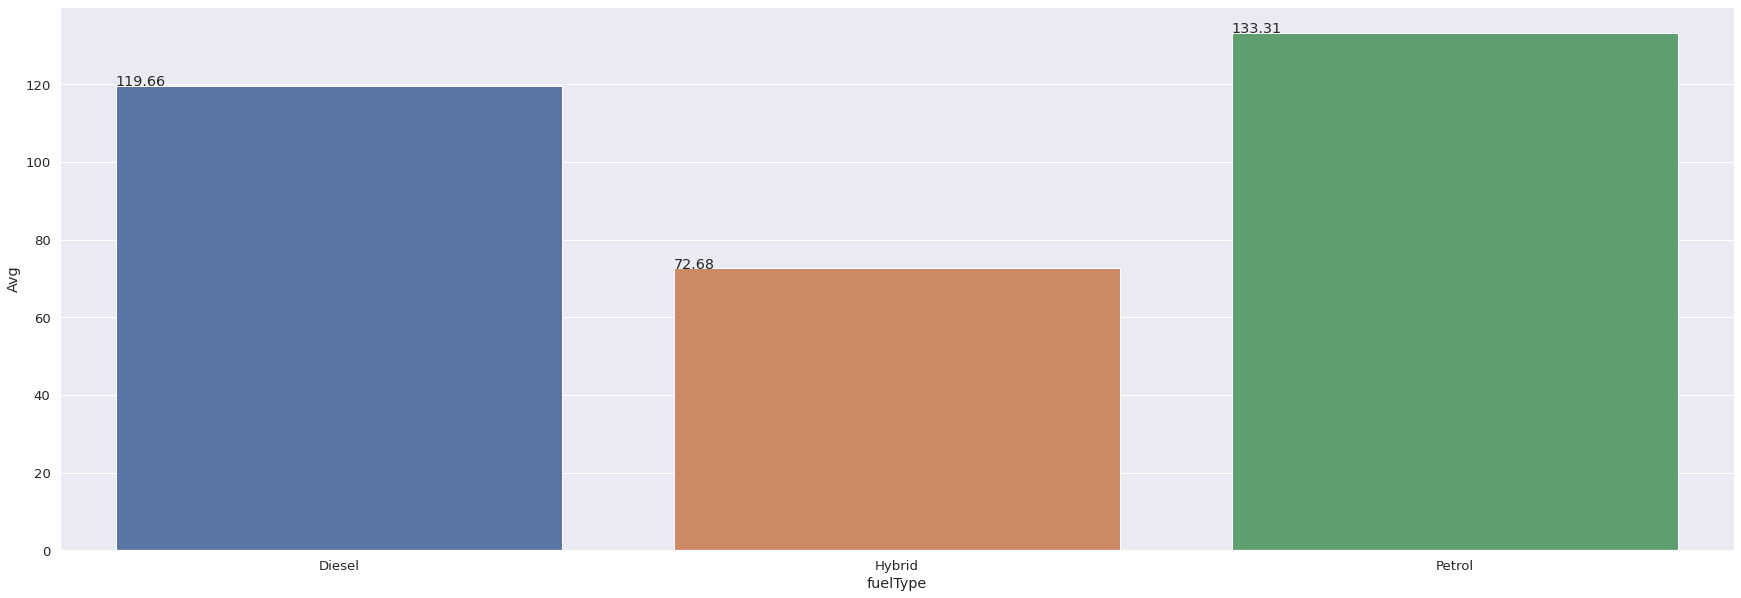

In [ ]:
sns.set(font_scale=1.2)
fig, ax = plt.subplots(figsize=(30, 10))

ax = sns.barplot(data=df2, x='fuelType', y='Avg')
for p in ax.patches:
   ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x(), p.get_height()+0.01))

plt.show()

Jak můžeme vidět, tak nejvíce se platí daň za vozidla u benzínu, pak je o několik dolarů za ním je diesel. S velkým odstupem je posléze Hybrid, za který se platí nejméně.

Je tohle ale vážně ukazatel ceny?

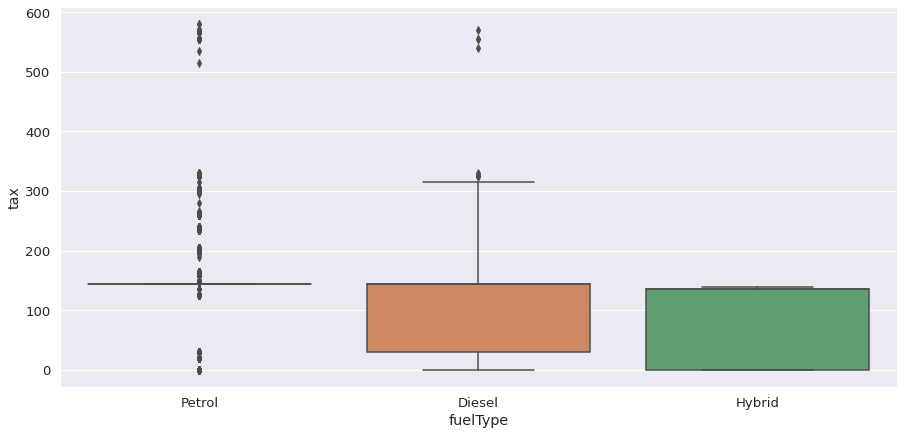

In [ ]:
sns.set(font_scale=1.2)
fig, ax = plt.subplots(figsize=(15, 7))
sns.boxplot(data=df, x='fuelType', y="tax")

Dle vytvořeného boxplotu můžeme vidět, že cena Benzínových vozidel má samé outliery a tedy není vhodné je házet všechny do jednoho pytle narozdíl od ostatních paliv, kde se většina vlezla do středních hodnot a tudíž je pro ně předchozí graf docela relevantní.

Podívame se tedy na daně dle paliva u každého modelu zvlášť.

In [ ]:
j = 0
for i in range(len(df.model.unique())):
  df_help = df.loc[df['model'] == df.model.unique()[i]]
  if len(df_help.fuelType.unique()) > 1:
    j = j+1

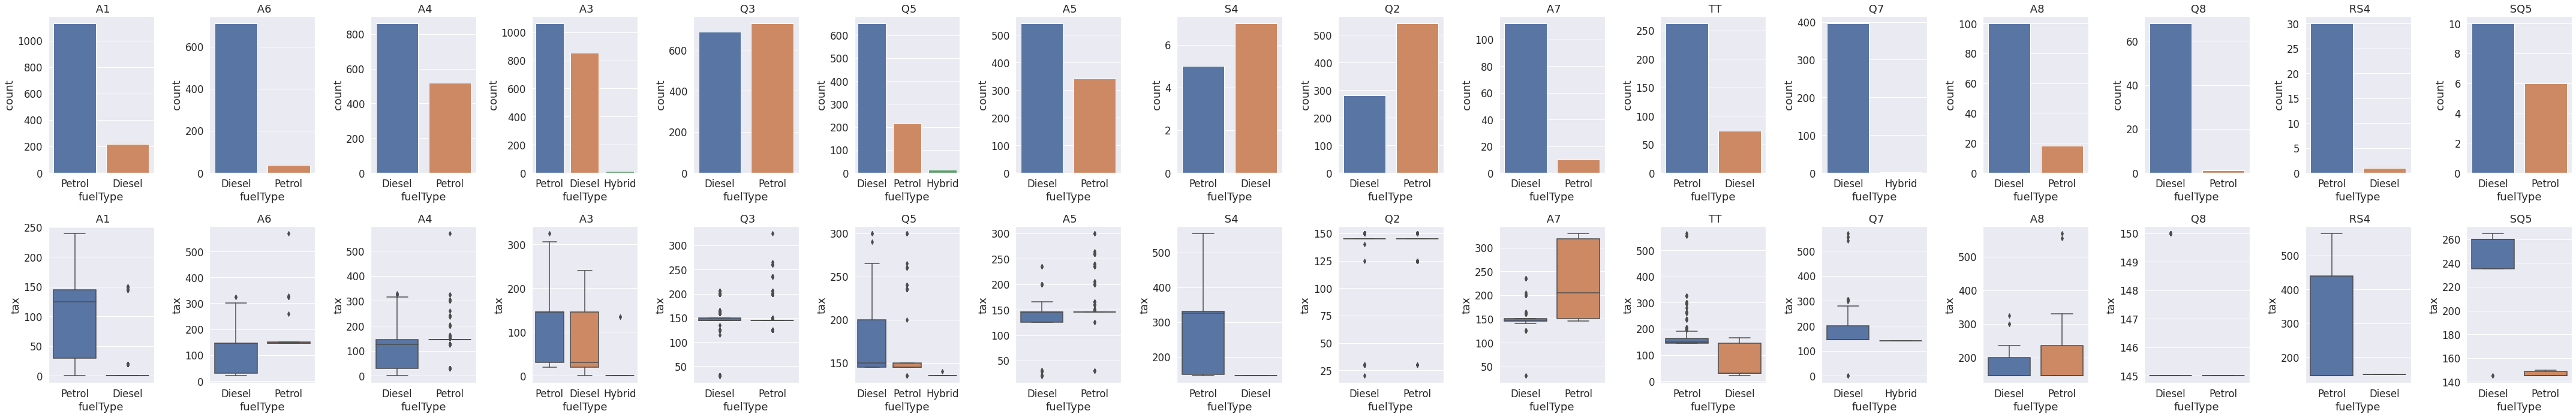

In [ ]:
x = 0
sns.set(font_scale=1.5)
fig, axes = plt.subplots(2, j, figsize=(60, 10))

for i in range(len(df.model.unique())):
  df_help = df.loc[df['model'] == df.model.unique()[i]]
  if len(df_help.fuelType.unique()) > 1:
    ax_one = fig.axes[x]
    ax_two = fig.axes[j+x]
    sns.countplot(data=df_help, x='fuelType',ax=ax_one).set(title=df.model.unique()[i])
    sns.boxplot(data=df_help, x='fuelType', y="tax",ax=ax_two).set(title=df.model.unique()[i])
    x = x + 1
    

fig.tight_layout()


Na těchto boxplotech můžeme vidět také, že většinou je daň vyšší u vozidel s benzínem, ale není tomu vždy tak, také lze vidět, že je zde velký počet outlierů, takže víme, že palivo nemusí být klíčová věc u daně u vozidel jezdících na Diesel a Benzín, zatím co u Hybridních lze vidět, že jejich daň je docela kozistentní a má toto palivo vliv na celkovou daň

# 9) Nejvýhodnější vozidla

Nyní zjístíme, které vozidlo se vyplatí koupit v závislosti na ceně, dani a stáří vozidla. 

Myslím si, že to bude nějaké středně staré vozidlo, které by mohlo jezdit na hybridní palivo, jelikož z předchozích analýz jsme zjistili, že nejlevnější je právě toto palivo co se týče najetých mil na galon a také daň u vozidel.

**Tohle je 5 nejlevnějších vozů dle jejich prodejní ceny.**

In [ ]:
df.sort_values(by='price', ascending=True).head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
10588,A3,2003,1490,Automatic,101000,Diesel,240,44.5,1.9
10552,A4,2004,1699,Manual,110000,Diesel,315,36.2,2.5
7795,A3,2005,1975,Manual,104000,Petrol,240,38.1,2.0
10108,TT,2002,1990,Manual,131925,Petrol,325,30.1,1.8
7404,A3,2009,2490,Manual,152034,Diesel,150,55.4,1.9


**Top 5 vozidel, dle ujetých mil na galon**

In [ ]:
df.sort_values(by='mpg', ascending=False).head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
4493,A3,2014,15490,Automatic,24597,Hybrid,0,188.3,1.4
3106,A3,2015,14981,Semi-Auto,28294,Hybrid,0,188.3,1.4
10392,A3,2015,14000,Automatic,63000,Hybrid,0,188.3,1.4
4879,A3,2014,15000,Semi-Auto,24597,Hybrid,0,188.3,1.4
4261,A3,2015,17990,Automatic,14000,Hybrid,0,188.3,1.4


**Top 5 vozidel dle daně**

In [ ]:
df.sort_values(by='tax', ascending=True).head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
1342,A4,2016,14995,Manual,41100,Diesel,0,74.3,2.0
3504,A4,2016,13695,Semi-Auto,40491,Diesel,0,72.4,2.0
9264,A1,2016,12490,Manual,25103,Petrol,0,67.3,1.0
9784,A4,2016,12499,Manual,58204,Diesel,0,72.4,2.0
9785,A3,2015,9999,Manual,50325,Diesel,0,74.3,1.6


Jak můžeme vidět z těchto 3 tabulek, každá z nich má v top 5 jiná vozidla, takže žádné není jedno z nejlepších každé z těchto 3 kategorií. 
Tím pádem musíme najít ideální vůz, který by měl nejlepší paramtery v těchto oblastech.

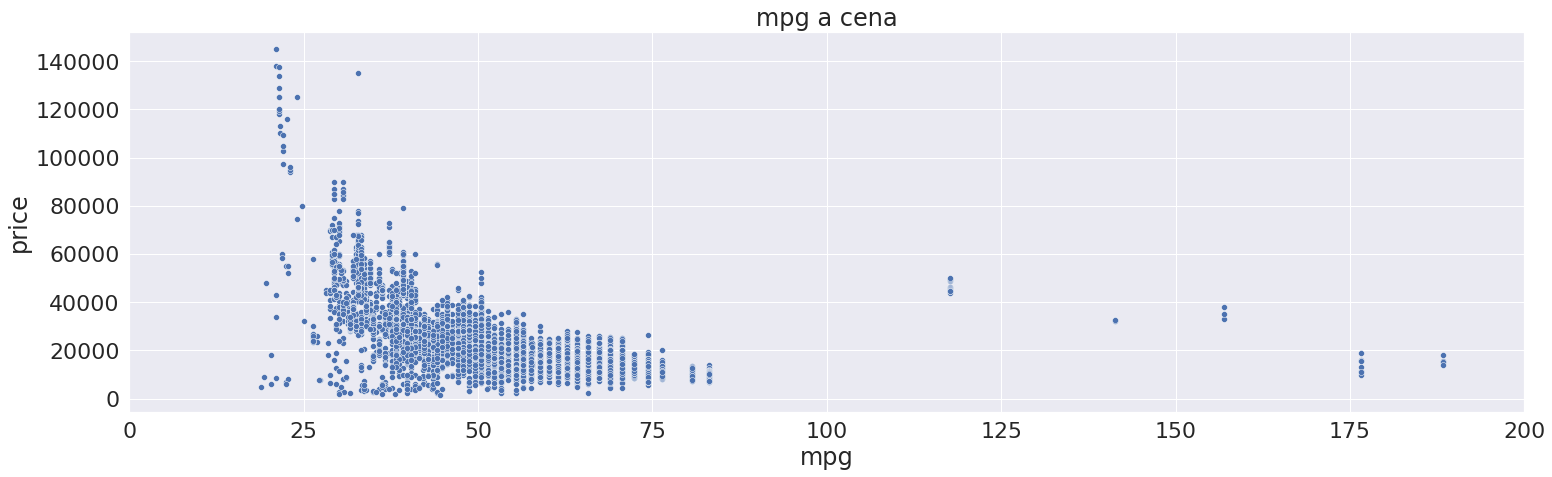

In [ ]:
df2 = df.loc[df['year'] == 2020]
df2

fig, ax = plt.subplots(figsize=(25, 7))
sns.set(font_scale=2)
ax = sns.scatterplot(data = df, x = "mpg", y = "price")
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x(), p.get_height()+0.01))
plt.title("mpg a cena")
plt.xlim(0, 200)
plt.show()

Dle grafu, kde pozorujeme cena vs kolik ujede vozidlo mil na jeden galon, můžeme vidět, že v pravém dolním rohu je několik vozidel, které toho na 1 galon ujedou hodně a zároveň moc nestojí, takže se koukneme co jsou tyto vozy zač.

In [ ]:
df2 = df.loc[df['mpg'] > 175]
df2

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
3106,A3,2015,14981,Semi-Auto,28294,Hybrid,0,188.3,1.4
4261,A3,2015,17990,Automatic,14000,Hybrid,0,188.3,1.4
4493,A3,2014,15490,Automatic,24597,Hybrid,0,188.3,1.4
4559,A3,2015,16000,Semi-Auto,48954,Hybrid,0,176.6,1.4
4879,A3,2014,15000,Semi-Auto,24597,Hybrid,0,188.3,1.4
5717,A3,2016,18900,Semi-Auto,18486,Hybrid,0,176.6,1.4
8323,A3,2016,15499,Automatic,48573,Hybrid,0,176.6,1.4
8570,A3,2015,9795,Automatic,121420,Hybrid,0,176.6,1.4
8875,A3,2015,11295,Automatic,72260,Hybrid,0,176.6,1.4
10003,A3,2016,13000,Automatic,72800,Hybrid,0,176.6,1.4


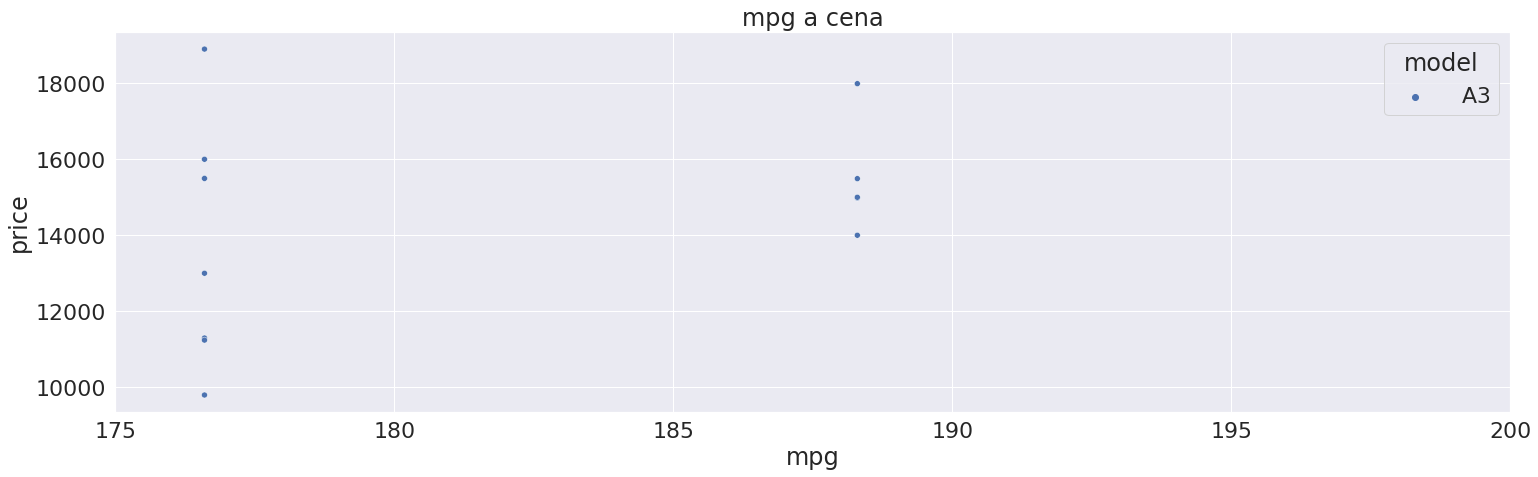

In [ ]:

fig, ax = plt.subplots(figsize=(25, 7))
sns.set(font_scale=2)
ax = sns.scatterplot(data = df2, x = "mpg", y = "price", hue="model")
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x(), p.get_height()+0.01))
plt.title("mpg a cena")
plt.xlim(175, 200)
plt.show()

Zde můžeme vidět, že veškeré vozy, které ujedou hodně a zároveň stojí málo jsou vozy modelu A3, takže se jistě vyplatí koupit jedno z vozidel této řady. Výhodou také je, že všechna tato vozidla jsou poměrně nová, takže jejich poruchavost bude jistě menší, než u starších vozidel. Také se mi potvrdilo, že toto vozidlo bude jezdit na Hybridní pohon, což jsou všechny z těchto vozidel A3. Také si povšimněte, že daň je nulová.

Za mě je absolutní vítěz vozidlo A3 za 14000 dollaru, protože ujede o dost víc než ostatní jeho sourozenci. Sice není nejlevnější z těchto vozidel, ale při tom, jak moc často budete jezdit, tak zjistíte, že za ušetřené galony se celkově poté vyplatí.

# 10) Nejdražší vozidlo

Nyní nalezneme opak toho nejvýhodnějšího, takže nejdražší. 
Dle mě to bude nějaké vozidlo, ketré bude automat, či poloautomat, jelikož  ho mají většinou závodní modely, což si myslím, že bude i tento případ. Také bude jistě jezdit na benzín, který dokáže vyvinou nejvyšší rychlost.

**Tohle je 5 nejdražších vozů dle jejich prodejní ceny.**

In [ ]:
df.sort_values(by='price', ascending=False).head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
4783,R8,2020,145000,Semi-Auto,2000,Petrol,145,21.1,5.2
2255,R8,2020,137995,Semi-Auto,70,Petrol,145,21.1,5.2
4179,R8,2019,137500,Semi-Auto,10,Petrol,150,21.4,5.2
3367,R8,2019,135000,Automatic,1000,Petrol,145,32.8,5.2
5459,R8,2020,133900,Semi-Auto,333,Petrol,145,21.4,5.2


**Top 5 vozidel, dle ujetých mil na galon**

In [ ]:
df.sort_values(by='mpg', ascending=True).head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
10427,A8,1997,4650,Automatic,122000,Petrol,265,18.9,4.2
8941,A6,2004,8995,Automatic,100730,Petrol,325,19.3,4.2
1869,R8,2013,47995,Manual,19834,Petrol,570,19.6,4.2
10171,RS4,2006,17999,Manual,66000,Petrol,535,20.3,4.2
9829,S4,2007,5995,Manual,101000,Petrol,555,20.3,4.2


**Top 5 vozidel dle daně**

In [ ]:
df.sort_values(by='tax', ascending=False).head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
7475,R8,2014,59990,Automatic,31930,Petrol,580,21.9,5.2
9076,R8,2008,33950,Automatic,52500,Petrol,580,21.0,4.2
9868,R8,2015,54945,Automatic,23924,Petrol,570,22.8,4.2
4976,R8,2014,51990,Semi-Auto,19800,Petrol,570,22.8,4.2
5980,R8,2016,79900,Semi-Auto,10172,Petrol,570,24.8,5.2


In [ ]:
df2 = df.loc[df['price'] >= 100000]
df3 = df2.loc[df['mpg'] <= 25]
df2.sort_values(by='price', ascending=False)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
4783,R8,2020,145000,Semi-Auto,2000,Petrol,145,21.1,5.2
2255,R8,2020,137995,Semi-Auto,70,Petrol,145,21.1,5.2
4179,R8,2019,137500,Semi-Auto,10,Petrol,150,21.4,5.2
3367,R8,2019,135000,Automatic,1000,Petrol,145,32.8,5.2
5459,R8,2020,133900,Semi-Auto,333,Petrol,145,21.4,5.2
1646,R8,2019,129000,Semi-Auto,4000,Petrol,145,21.4,5.2
4925,R8,2019,125000,Semi-Auto,500,Petrol,145,21.4,5.2
3359,R8,2019,125000,Automatic,100,Petrol,145,24.1,5.2
10468,R8,2019,125000,Automatic,13663,Petrol,150,21.4,5.2
7445,R8,2019,119995,Semi-Auto,7800,Petrol,145,21.4,5.2


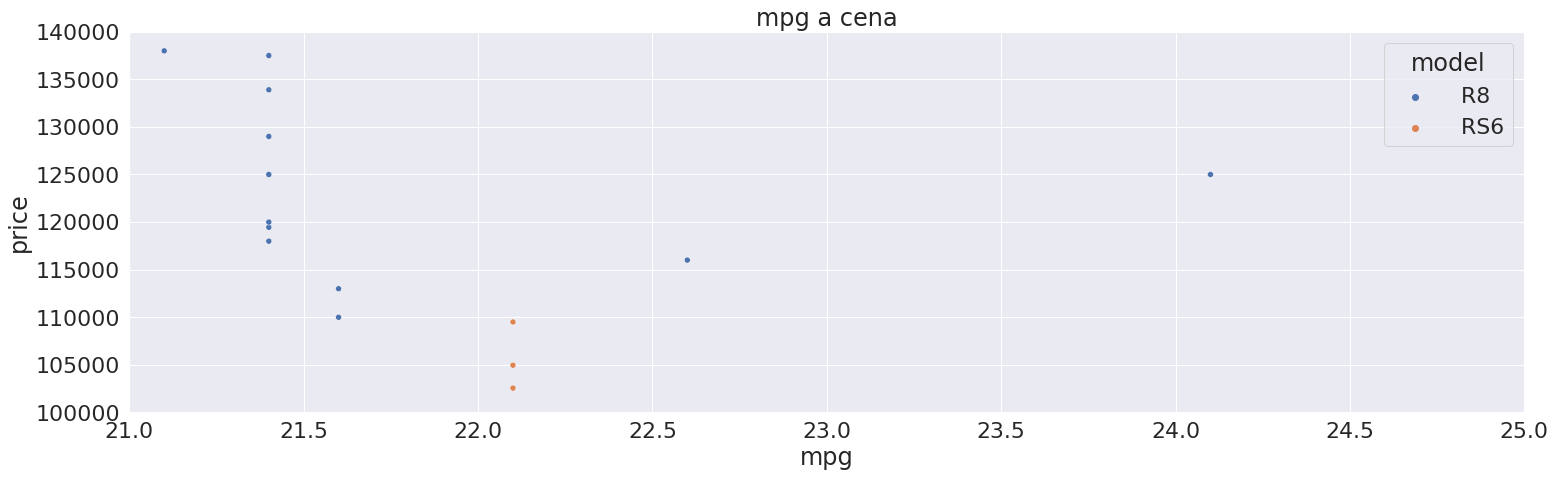

In [ ]:


fig, ax = plt.subplots(figsize=(25, 7))
sns.set(font_scale=2)
ax = sns.scatterplot(data = df3, x = "mpg", y = "price", hue="model")
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x(), p.get_height()+0.01))
plt.title("mpg a cena")
plt.xlim(21, 25)
plt.ylim(100000, 140000)
plt.show()

Z grafu můžeme vidět, že nejdražšími vozy jsou vozy modelu R8 A RS6, kde R8 výrazně vede R8. Také můžeme vidět, že platí má teorie, že vozidla budou buď s polo, nebo plně automatickou převodovkou. Všechny také jezdí na benzín takže i v tom se má teorie potvrdila. Nicméně jejich daň není ta nejvyšší, takže se podíváme ještě na vozidla s vysokou daní.

Minimálně dle tabulky výše lze vidět, že jsou to také vozidla modelu R8, ale jsou narozdíl od svých bratrů starší a také mají více ujetých km, takže je jisté, že tyto dvě věci mají vliv na jejich cenu. Nicméně se daň platí méněkrát než kolikrát se tankuje, takže na ježdění výjdou dráže.
Tím pádem na normální ježdění se jistě nevyplatí model R8 z roku 2020 za 145000

# Závěr

Dle těchto několika analýz jsme mohli zjistit, že nejvýhodnějšími vozy jsou vozy s Hybridním palivem, jelikož tyto vozidla ujedou na jeden galon nejvíc kilometrů a také toto palivo odsti ovlivňuje jejich cenu, jelikož jsou celkově vozy na Hbyridní pohon levnější, což jsme mohli vidět také u 9. analýzy, kde jsme viděli, že byly přesně hybridní.

Také jsme viděli, že se právě hybridní palivo čím dál víc dostává do módy, kdy novější vozy již disponuji touto možností a tím víc se ustupuje od dalších paliv. Zatím je ale stále nejvíc Dieslů a benzínů.

Cena vozdiel z části zavisí na stáří a jeho počtu ujetých kilometrů, ale není to pravidlem, jelikož několik vozů si cenu drží přes svůj věk.

Také jsme zjistili, že objem motoru souvisí s typem paliva, jelikož každé potřebuje ke své práci jiný počet množství paliva, kde vyhrál diesel, jelikož ho spotřebuje daleko méně než benzín. Také hybridní paliva se držely mezi hodnotami Dieselu a Benzínu, za to ale, jak jsem již psal, jsou výhodnější v jiných ohledech.

Také jsme si potvrdili to, že starší auta mají větší daň, než vozidla nová a to může být z důvodů především ekologických, kde většinou starší vozy vypouštějí více škodlivin do ovzduší než ty nové.

Všimli jsme si, že manuální převodovka je šetrnější k naši nádrži, než převodovky polo a automatické, kde se o řazení člověk nestará.

Z předchozích bodů může naznačovat, že převodovka je věc co ovlivňuje vzdálenost, kterou lze na jeden galon ujet, ale poté jsme zjistili, že záleží více na objemu motoru, jelikož při větší velikosti se musí do motoru dostat více paliva a tím pádem se rychleji vypotřebuje.

Zjistili jsme, že daň je především ovlivněna věkem vozidla a ujetého počtu kilometrů, než jeho paliva. Zároveň šlo ale vidět, že hybridní vozidla měly daň o dost menší, než ostatní paliva, takže zde již na palivu dosti závisí. Je to znovu díky ekologii, kde hybridní vůz je šetrnější.

Celkově jsme zjistili, že nejlepší vozidlo je AUDI A3, které jezdí na hybridní pohon, protože jejich daň je nulová a ujedou o dost víc, než ostatní vozy. Takže cena se postupně vyrovná s méně šetrnými vozidly.

Nejhorší jsou vozidla především modelu R8, které jezdí na benzín. Jejich dojezd je velice malý a jejich cena je neuvěřitelně velká oproti ostatním vozidlům. Jediný model, který mu lehce může "konkurovat" je model RS6, ketrý má podobné vlastnosti jako R8, ale je lehce levnější.